# <<*`Flight Delay Analysis Data Preprocessing and Visualizations`*>>

Datasets Provided:
- US Dept. of Transportation on-time performance data for non-stop domestic flights
  -  Flight Trip details
  -  All weather Stations data
  -  Weather data of 6 months of a year 2004 and 2005

**`Problem Description:`**
----

Air travel is becoming increasingly complex with multiple variables impacting the same. The flight delay is one of such variables impacts carrier, Airport, and passenger and may result in significant commercial loss or reputation loss to all the stakeholders and thus huge cost on the economy. Thus, prediction of delay is crucial not only from viewpoint of a customer from the time management perspective and carrier for retention of customer faith but also from Airport point of view for managing the traffic more efficiently to optimize the number of arriving flights by appropriate adjustment of schedules. The contribution of weather conditions has been identified to be a very important contributor to these delays. 
It is of the utmost interest of one of the participants of the ecosystem to predict flight delays based on the flight's details and predicted weather conditions by a good predictive model, which you are going to build, to take the necessary corrective and preventive actions to improve business as well as service. 
The historical data containing scheduled departure and arrival times, date, origin, destination and also weather data is available and we the data scientists can predict if the delay can happen or not using the flight data and aviation weather data for a specific flight.

**`About Data:`**

Every single flight is observed as per their scheduled departure and arrival timestamps, to record the details of trips made, traffic conditions, etc. Flight details like Origin, destination, date of flight, scheduled departure and scheduled arrival timestamps etc. Weather stations data details like station id along with it’s linked AirportID, ground height etc. Hourly aviation weather conditions data also provided for 2 years etc. Origin, Destination details in-flight data can be mapped to the AirportID in other datasets.

**`Objectives:`**

1. Deriving the Categorical Target Attribute “FlightDelayStatus”:
       - Deriving the categorical Target attribute “FlightDelayStatus”  for Train data provided
2. Predicting the flight delay ‘1’ or ‘2’ for the test set :
       - Creating an analytical and modeling framework to predict the flight delay of each id categorizing into “1” or ”2”

             “1” indicates: “Yes” and 
             “2” indicates: ”No”


**`Task:`**

Build a binary classification model for predicting arrival delays > 15minutes without using Actual Arrival time as an input feature.

`Approach Followed:`
----
- Read the flight trip details Train and Test data
- Read the 2005 weather details data

`Train Data:`
- Merged Flight trip train data with 2004 Origin based weather data and filtered the rows based on last updated weather details
- Merged Flight trip train data with 2004 destination based weather data and filtered the rows based on last updated weather details
- Merged both Origin and destination dataframes and made one

`Test Data:`
- Merged Flight trip test data with 2005 Origin based weather data and filtered the rows based on last updated weather details
- Merged Flight trip test data with 2005 destination based weather data and filtered the rows based on last updated weather details
- Merged both Origin and destination dataframes and made one

Saved Above dataframes into CSV files and send for further processing to make it ready for model Building. 

#### Link to [Final Data Processing and Model Building Python file](22022019_Batch%2049_PHD_ML_2383_FinalData.ipynb)

### <<`Supporting Libraries Import`>> <a class="anchor" id="first-bullet"></a> 

In [1]:
import pandas as pd
import numpy as np
import os 

#visualization
#import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


#ML
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import ensemble, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
import keras
from keras.layers import Dense
from keras .models import Sequential

import warnings
warnings.filterwarnings('ignore')
from time import time
from concurrent.futures import ThreadPoolExecutor

/usr/lib64/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/lib64/python2.7/site-packages/cffi/model.py:531: UserWarning: 'point_conversion_form_t' has no values explicitly defined; guessing that it is equivalent to 'unsigned int'
  % self._get_c_name())


## `Reading Data`<a class="anchor" id="Reading-bullet"></a>

### `Flights Trip Details Data`

In [2]:
os.chdir("/home/B49gpu3/2383/Data") #change working directory

#Reading the flight trip details data
flighttrip_data = pd.read_csv("FlightDelay_Train-1550042794911.csv", sep=",",
                  na_values="'', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'")


In [3]:
os.chdir("/home/B49gpu3/2383/Data") #change working directory

#Reading the flight trip details data
flighttrip_testdata = pd.read_csv("FlightDelay_Test.csv", sep=",",
                  na_values="'', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'")


In [4]:
flighttrip_data.shape

(7861, 12)

In [5]:
flighttrip_testdata.shape

(6566, 11)

### checking for shapes of flight datasets

In [ ]:
# print "Train datatypes"  
print flighttrip_data.dtypes
print " "
print "Test Datatypes"
print flighttrip_testdata.dtypes

### Checking for nulls and its sample data

In [7]:
flighttrip_data.isnull().sum()

FlightNumber              0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
ScheduledDepTime          0
ScheduledArrTime          0
ScheduledTravelTime       0
Origin                    0
Destination               0
Distance                  0
ActualArrivalTimeStamp    0
dtype: int64

In [8]:
flighttrip_testdata.isnull().sum()

FlightNumber           0
Year                   0
Month                  0
DayofMonth             0
DayOfWeek              0
ScheduledDepTime       0
ScheduledArrTime       0
ScheduledTravelTime    0
Origin                 0
Destination            0
Distance               0
dtype: int64

In [9]:
flighttrip_data.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,563,20-09-2004 11:54
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,19-11-2004 18:55
2,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,LAS,226,04-05-2004 19:02
3,CLT_TPA_51502,2004,7,6,2,1400,1533,93,CLT,TPA,508,06-07-2004 15:33
4,MSP_ORD_44884,2004,9,23,4,830,946,76,MSP,ORD,334,23-09-2004 09:46


In [10]:
flighttrip_testdata.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance
0,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,XNA,616
1,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,278
2,IAD_GSO_86576,2005,9,28,3,1040,1144,64,IAD,GSO,239
3,SAV_CVG_87264,2005,11,18,5,1120,1302,102,SAV,CVG,515
4,SBP_LAX_68158,2005,7,5,2,630,733,63,SBP,LAX,155


### Checking for Summary Statistics

In [11]:
flighttrip_data.describe()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Distance
count,7861.0,7861.00000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,2004.0,7.12085,15.441292,3.960946,1198.225417,1412.232922,129.623839,743.764025
std,0.0,2.82233,9.049019,1.980921,354.923067,369.739052,63.272072,522.629372
min,2004.0,1.00000,1.000000,1.000000,215.000000,553.000000,61.000000,69.000000
25%,2004.0,5.00000,7.000000,2.000000,900.000000,1111.000000,83.000000,368.000000
50%,2004.0,7.00000,15.000000,4.000000,1215.000000,1430.000000,112.000000,595.000000
75%,2004.0,9.00000,23.000000,6.000000,1518.000000,1728.000000,155.000000,951.000000
max,2004.0,11.00000,31.000000,7.000000,1800.000000,2300.000000,562.000000,4962.000000


In [12]:
flighttrip_testdata.describe()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Distance
count,6566.0,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000
mean,2005.0,7.261956,15.856381,3.916844,1206.076150,1422.606458,133.033506,766.722662
std,0.0,2.931392,8.864432,1.935778,357.850338,374.715953,64.333398,528.835476
min,2005.0,3.000000,1.000000,1.000000,239.000000,518.000000,61.000000,81.000000
25%,2005.0,3.000000,8.000000,2.000000,906.000000,1117.000000,85.000000,383.000000
50%,2005.0,7.000000,16.000000,4.000000,1227.000000,1441.000000,115.000000,612.000000
75%,2005.0,9.000000,23.000000,6.000000,1525.000000,1737.000000,160.000000,988.000000
max,2005.0,11.000000,31.000000,7.000000,1800.000000,2300.000000,557.000000,4502.000000


### Reading `All Stations Data`

In [13]:
AllStations_data= pd.read_table("AllStationsData_PHD.txt", sep="\|",
                   na_values="'', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'")

### Checking its shape, datatypes and null values

In [14]:
AllStations_data.shape

(1744, 8)

In [15]:
AllStations_data.dtypes

"WeatherStationID"      int64
"AirportID"            object
"GroundHeight"          int64
"StationHeight"         int64
"BarometerHeight"       int64
"Latitude"            float64
"Longitude"           float64
"TimeZone"             object
dtype: object

In [16]:
AllStations_data.isnull().sum()

"WeatherStationID"    0
"AirportID"           0
"GroundHeight"        0
"StationHeight"       0
"BarometerHeight"     0
"Latitude"            0
"Longitude"           0
"TimeZone"            0
dtype: int64

### Removing extra characters from all columns a Timezone column values

In [17]:
#Removing the doublequotes from header 
AllStations_data.columns=AllStations_data.columns.str.replace('"','')

In [18]:
AllStations_data["AirportID"]=AllStations_data["AirportID"].str.replace('"','')

In [19]:
AllStations_data["TimeZone"]=AllStations_data["TimeZone"].str.replace('"','')

In [20]:
AllStations_data.tail()

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
1739,94997,ADC,0,0,0,46.27,-95.13,+6
1740,94998,ADU,0,0,0,41.42,-94.55,+6
1741,94999,AIT,0,1204,0,46.33,-93.41,+6
1742,96401,IEC,0,1350,0,62.50,-149.55,+9
1743,96402,JVM,0,870,0,61.44,-148.56,+9


### Checking for value counts of Timezone and changing appropriate values

In [21]:
AllStations_data["TimeZone"].value_counts()

+6                  647
+5                  545
+8                  195
+7                  193
+9                  131
+10                  13
+4                    6
Yukon Standard        5
-10                   4
Alaska-Hawaii         3
Eastern Standard      1
Bering Standard       1
Name: TimeZone, dtype: int64

In [22]:
AllStations_data1= AllStations_data.copy()

In [23]:
AllStations_data1[AllStations_data1["TimeZone"]=='-10']

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
1091,40309,PTKR,94,109,98,7.20,134.29,-10
1094,40604,PKWA,8,26,11,8.44,167.44,-10
1095,40710,PKMR,10,10,8,7.05,171.23,-10
1097,41415,GUM,247,250,250,13.29,144.48,-10


In [24]:
AllStations_data[AllStations_data["TimeZone"]== "Yukon Standard"] = "-8"
AllStations_data[AllStations_data["TimeZone"]== "Eastern Standard"] = "-5"
AllStations_data[AllStations_data["TimeZone"]== "Bering Standard"] = "+12"
#AllStations_data[AllStations_data["TimeZone"]== "Alaska-Hawaii"] = "+12"

In [25]:
(AllStations_data.loc[(AllStations_data['TimeZone'] == "Alaska-Hawaii")])

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
1096,41414,UAM,0,612,0,13.35,144.57,Alaska-Hawaii
1099,41420,TNI,0,271,0,15,145.37,Alaska-Hawaii
1101,41818,SPN,209,210,212,15.07,145.44,Alaska-Hawaii


In [26]:
#https://airnav.com/airport/PGWT -TNI
#https://en.wikipedia.org/wiki/List_of_tz_database_time_zones - SPN(Indiana)
#https://www.zeitverschiebung.net/en/search/?q=Yigo+Guam+ - UAM(Yigo Guam)

In [27]:
AllStations_data["TimeZone"] = np.where((AllStations_data["TimeZone"]== "Alaska-Hawaii") & (AllStations_data['AirportID'] == "SPN"), '-5', AllStations_data["TimeZone"] )
AllStations_data["TimeZone"] = np.where((AllStations_data["TimeZone"]== "Alaska-Hawaii") & (AllStations_data['AirportID'] == "TNI"), '+10', AllStations_data["TimeZone"])
AllStations_data["TimeZone"] = np.where((AllStations_data["TimeZone"]== "Alaska-Hawaii") & (AllStations_data['AirportID'] == "UAM"), '+10', AllStations_data["TimeZone"])


In [28]:
AllStations_data["TimeZone"].value_counts()

+6     647
+5     545
+8     195
+7     193
+9     131
+10     15
+4       6
-8       5
-10      4
-5       2
+12      1
Name: TimeZone, dtype: int64

### `Merging Flightrip details data and all stations data`

Merging is done based on origin, Airport id and Timezones of origin and Destination and creating a new Dataframes

In [ ]:
#taking a copy of all the datasets
flighttrip_data1= flighttrip_data.copy()
AllStations_data_origin = AllStations_data.copy()
AllStations_data_Dest = AllStations_data.copy()


Merging the data

In [30]:
AllStations_data_origin =AllStations_data_origin.rename(index=str, columns={"AirportID": "Origin"})
AllStations_data_Dest =AllStations_data_Dest.rename(index=str, columns={"AirportID": "Destination"})

#Origintzcols=['Origin', 'TimeZone']
flightstation1_origin= flighttrip_data1.merge(AllStations_data_origin, on='Origin', how='left')
flightstation1_dest= flighttrip_data1.merge(AllStations_data_Dest, on='Destination', how='left')


In [31]:
#checking for merged sample data
flightstation1_dest.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp,WeatherStationID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,563,20-09-2004 11:54,14820,802,805,805,41.24,-81.51,+5
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,19-11-2004 18:55,13874,971,1026,974,33.38,-84.26,+5
2,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,LAS,226,04-05-2004 19:02,23169,2127,2180,2091,36.05,-115.1,+8
3,CLT_TPA_51502,2004,7,6,2,1400,1533,93,CLT,TPA,508,06-07-2004 15:33,12842,8,11,40,27.58,-82.32,+5
4,MSP_ORD_44884,2004,9,23,4,830,946,76,MSP,ORD,334,23-09-2004 09:46,94846,655,674,658,41.59,-87.55,+6


In [32]:
#checking for merged sample data
flightstation1_origin.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp,WeatherStationID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,563,20-09-2004 11:54,14739,19,30,180,42.22,-71.01,+5
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,19-11-2004 18:55,14820,802,805,805,41.24,-81.51,+5
2,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,LAS,226,04-05-2004 19:02,93184,49,55,52,33.41,-117.52,+8
3,CLT_TPA_51502,2004,7,6,2,1400,1533,93,CLT,TPA,508,06-07-2004 15:33,13881,721,769,724,35.13,-80.56,+5
4,MSP_ORD_44884,2004,9,23,4,830,946,76,MSP,ORD,334,23-09-2004 09:46,14922,871,838,874,44.53,-93.14,+6


Renaming its appropriate timezone columns according to source and destination

In [33]:
flightstation1_origin =flightstation1_origin.rename(index=str, columns={"TimeZone": "Origin_TimeZone"})
flightstation1_dest =flightstation1_dest.rename(index=str, columns={"TimeZone": "Destination_TimeZone"})

Checking for null values in origin column

In [34]:
flightstation1_origin.isnull().sum()

FlightNumber              0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
ScheduledDepTime          0
ScheduledArrTime          0
ScheduledTravelTime       0
Origin                    0
Destination               0
Distance                  0
ActualArrivalTimeStamp    0
WeatherStationID          0
GroundHeight              0
StationHeight             0
BarometerHeight           0
Latitude                  0
Longitude                 0
Origin_TimeZone           0
dtype: int64

Merging Destination and Origin weatherstation, flight and weather data

In [35]:
flightstation1_origin.index = flightstation1_dest.index
flightstation1_tz= pd.concat([flightstation1_origin, flightstation1_dest[['Destination_TimeZone']]], axis=1)

In [36]:
flightstation1_tz.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp,WeatherStationID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,Origin_TimeZone,Destination_TimeZone
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,563,20-09-2004 11:54,14739,19,30,180,42.22,-71.01,+5,+5
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,19-11-2004 18:55,14820,802,805,805,41.24,-81.51,+5,+5
2,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,LAS,226,04-05-2004 19:02,93184,49,55,52,33.41,-117.52,+8,+8
3,CLT_TPA_51502,2004,7,6,2,1400,1533,93,CLT,TPA,508,06-07-2004 15:33,13881,721,769,724,35.13,-80.56,+5,+5
4,MSP_ORD_44884,2004,9,23,4,830,946,76,MSP,ORD,334,23-09-2004 09:46,14922,871,838,874,44.53,-93.14,+6,+6


## `Train Target Variable derivation`

Changing time columns to strings

In [37]:
time_cols=['ScheduledDepTime','ScheduledArrTime']
flightstation1_tz[time_cols]= flightstation1_tz[time_cols].astype(str)

Changing the format of the provided Scheduled departure time column to 4 digit time value

In [38]:
flightstation1_tz=flightstation1_tz.assign(ScheduledDepTime=['00'+x if len(x)==2 else x for x in flightstation1_tz['ScheduledDepTime']])
flightstation1_tz=flightstation1_tz.assign(ScheduledDepTime=['0'+x if len(x)==3 else x for x in flightstation1_tz['ScheduledDepTime']])
flightstation1_tz=flightstation1_tz.assign(ScheduledArrTime=['00'+x if len(x)==2 else x for x in flightstation1_tz['ScheduledArrTime']])
flightstation1_tz=flightstation1_tz.assign(ScheduledArrTime=['0'+x if len(x)==3 else x for x in flightstation1_tz['ScheduledArrTime']])

Changing the formats of the time columns and date columns 

Creating a new column called Scheduled Departure Timestamp

In [39]:
#Changing datatypes Scheduled Departure time and Arrival time columns into time string columns
#flightstation_Dest['ScheduledDepTime'] = flightstation_Dest['ScheduledDepTime'] + flightstation_Dest["DestTimeZone"]
flightstation1_tz['ScheduledDepTime']=pd.to_datetime(flightstation1_tz["ScheduledDepTime"], format='%H%M').dt.strftime('%H:%M')
flightstation1_tz['ScheduledArrTime']=pd.to_datetime(flightstation1_tz["ScheduledArrTime"], format='%H%M').dt.strftime('%H:%M')


#Merging 'DayofMonth','Month','Year' columns and changing datatype into date columns
date_cols=['DayofMonth','Month','Year']
flightstation1_tz[date_cols]= flightstation1_tz[date_cols].astype(str)

#Creating new Columns ScheduledDepTimeStamp, ScheduledArrTimeStamp
flightstation1_tz['ScheduledDepDate'] =flightstation1_tz['DayofMonth']+ '-' + flightstation1_tz['Month'] + '-' +flightstation1_tz['Year']
flightstation1_tz['ScheduledDepTimeStamp']= flightstation1_tz['DayofMonth']+ '-' + flightstation1_tz['Month'] + '-' +flightstation1_tz['Year']+ " " + flightstation1_tz['ScheduledDepTime']

checking sample data of Actual Arrival Timestamp

In [40]:
flightstation1_tz['ActualArrivalTimeStamp'].head()

0    20-09-2004 11:54
1    19-11-2004 18:55
2    04-05-2004 19:02
3    06-07-2004 15:33
4    23-09-2004 09:46
Name: ActualArrivalTimeStamp, dtype: object

Checking for the Months numbers from the data provided

In [41]:
(pd.to_datetime(flightstation1_tz["ScheduledDepTimeStamp"], format="%d-%m-%Y %H:%M").dt.strftime("%m")).value_counts()

07    1763
05    1732
11    1626
09    1555
03     955
01     230
Name: ScheduledDepTimeStamp, dtype: int64

In [42]:
(pd.to_datetime(flightstation1_tz['ActualArrivalTimeStamp'], format="%d-%m-%Y %H:%M").dt.strftime("%m")).value_counts()

07    1763
05    1732
11    1626
09    1555
03     955
01     230
Name: ActualArrivalTimeStamp, dtype: int64

To convert datatypes of timestamp columns into datetime format rechecking its format to provide

In [43]:
flightstation1_tz["ScheduledDepTimeStamp"].head()

0     20-9-2004 10:00
1    19-11-2004 14:40
2      4-5-2004 18:00
3      6-7-2004 14:00
4     23-9-2004 08:30
Name: ScheduledDepTimeStamp, dtype: object

In [44]:
#converting datatypes of timestamp columns into datetime format
flightstation1_tz["ActualArrivalTimeStamp"] = pd.to_datetime(flightstation1_tz["ActualArrivalTimeStamp"], format="%d-%m-%Y %H:%M", exact=True)
flightstation1_tz["ScheduledDepTimeStamp"]= pd.to_datetime(flightstation1_tz["ScheduledDepTimeStamp"], format="%d-%m-%Y %H:%M", exact=True)

#flighttrip_data["ScheduledArrTimeStamp"]= pd.to_datetime(flighttrip_data["ScheduledArrTimeStamp"])
#flightstation_Dest["ActualArrivalTimeStamp"]= pytz.timezone(flightstation["OriginTimeZone"]).localize(flightstation_Dest["ActualArrivalTimeStamp"], is_dst=None).astimezone(flightstation_Dest["DestTimeZone"])


Rechecking whether dates are converted correctly or not

In [47]:
(pd.to_datetime(flightstation1_tz["ScheduledDepTimeStamp"], format="%d-%m-%Y %H:%M").dt.strftime("%m")).value_counts()

07    1763
05    1732
11    1626
09    1555
03     955
01     230
Name: ScheduledDepTimeStamp, dtype: int64

Rechecking both Dep and ActualArrival Timestamps format wheather both are in same formats are not

In [45]:
flightstation1_tz['ScheduledDepTimeStamp'].head()

0   2004-09-20 10:00:00
1   2004-11-19 14:40:00
2   2004-05-04 18:00:00
3   2004-07-06 14:00:00
4   2004-09-23 08:30:00
Name: ScheduledDepTimeStamp, dtype: datetime64[ns]

In [46]:
flightstation1_tz['ActualArrivalTimeStamp'].head()

0   2004-09-20 11:54:00
1   2004-11-19 18:55:00
2   2004-05-04 19:02:00
3   2004-07-06 15:33:00
4   2004-09-23 09:46:00
Name: ActualArrivalTimeStamp, dtype: datetime64[ns]

Taking the differnce between the timezones

In [50]:
#time difference between two zones
flightstation1_tz["Diff_TimeZone"]= flightstation1_tz["Origin_TimeZone"].astype(int) - flightstation1_tz["Destination_TimeZone"].astype(int)
flightstation1_tz["Diff_TimeZone"] = flightstation1_tz["Diff_TimeZone"]*60

In [52]:
pd.to_timedelta((flightstation1_tz["Diff_TimeZone"]), unit='m', box=False).value_counts()

00:00:00             4146
01:00:00             1430
-1 days +23:00:00    1308
-1 days +22:00:00     352
02:00:00              343
-1 days +21:00:00     148
03:00:00              124
-1 days +20:00:00       7
05:00:00                2
04:00:00                1
Name: Diff_TimeZone, dtype: int64

----------------------------------------------------------------------------------------------
Deriving a new Column called scheduledArrivalTimestamp by below formula
**`ScheduledArrTimestamp = scheduled Dep timestamp + scheduled travel minutes - timezone difference`**
------------------------------------------------------------------------------------------------

In [55]:
#Arrivaltimestamp(in terms of origin timezone) = schedDepTimeStamp+schedTravelminutes+TimeDiff
from datetime import timedelta
flightstation1_tz["ScheduledArrivalTimestamp"]= flightstation1_tz["ScheduledDepTimeStamp"] + pd.to_timedelta(flightstation1_tz["ScheduledTravelTime"], unit='m')-pd.to_timedelta(flightstation1_tz["Diff_TimeZone"], unit='m')

We have found data issues in 409 rows because of the below issues
- Total 64 Origin and Destination Weather station timezone details mismatch with its actual details( cross checked with the wikipedia and other resources
- Multiple columns having Actual arrival dates incorrect (validated using the above formula)

Below commented lines will prove the mismatch details.


In [60]:
#flightstation_tz_mismatch=(flightstation1_tz[(pd.to_datetime(flightstation1_tz["ScheduledArrivalTimestamp"], format= "%d-%m-%Y %H:%M:%S").dt.time) != 
#                  pd.to_datetime(flightstation1_tz["ScheduledArrTime"], format= "%H:%M").dt.time])

#len(set(flightstation_tz_mismatch['Origin']) & set(flightstation_tz_mismatch['Destination']))

#flightstation_tz_mismatch[flightstation_tz_mismatch["Origin"]=="ABQ"]

In [61]:
#flightstation_tz_mismatch['Destination'].value_counts()

Because of the mismatch details, Calculated Time in schedule Arrival timestamp is not matching with the provided schedule Arrival Time column, to correct it upto some extinct replaced calculated time with the time provided in Scheduled Arrival column

In [56]:
flightstation1_tz["ScheduledArrivalTimestamp1"]= (pd.to_datetime(flightstation1_tz["ScheduledArrivalTimestamp"], format="%Y-%m-%d %H:%M:%S").dt.strftime("%d-%m-%Y ")) + flightstation1_tz["ScheduledArrTime"]

In [57]:
flightstation1_tz["ScheduledArrivalTimestamp1"].head()

0    20-09-2004 11:54
1    19-11-2004 16:34
2    04-05-2004 19:02
3    06-07-2004 15:33
4    23-09-2004 09:46
Name: ScheduledArrivalTimestamp1, dtype: object

In [58]:
(pd.to_datetime(flightstation1_tz["ScheduledDepTimeStamp"], format="%d-%m-%Y %H:%M:%S").dt.strftime("%m")).value_counts()

07    1763
05    1732
11    1626
09    1555
03     955
01     230
Name: ScheduledDepTimeStamp, dtype: int64

In [59]:
flightstation1_tz.tail(100).T

,7761,7762,7763,7764,7765,7766,7767,7768,7769,7770,...,7851,7852,7853,7854,7855,7856,7857,7858,7859,7860
FlightNumber,SBN_ATL_31558,ATL_DCA_52704,BTR_DFW_39256,LAX_HNL_44442,ORD_BOS_43864,OAK_SAN_42691,DAL_ABQ_45602,ORD_EWR_53644,ORD_MCI_30092,MCO_BNA_50640,...,LEX_DCA_46111,ORD_DTW_27132,JFK_LAX_44037,EWR_TPA_29617,ATL_JAX_31089,IAH_DEN_53058,EWR_MEM_40118,IAD_GSO_49378,SLC_GEG_25787,FLL_CLE_41967
Year,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,...,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004
Month,5,7,3,3,9,11,3,7,11,9,...,9,7,9,9,7,5,11,5,1,11
DayofMonth,22,5,15,24,8,20,23,1,7,11,...,21,12,14,6,6,27,29,11,4,6
DayOfWeek,6,1,1,3,3,6,2,4,7,6,...,2,1,2,1,2,4,1,2,7,6
ScheduledDepTime,12:17,09:30,17:33,17:25,17:41,17:15,13:05,14:08,16:43,14:00,...,08:30,17:55,11:00,11:55,12:51,07:35,11:55,12:50,11:30,13:25
ScheduledArrTime,15:12,11:05,19:00,21:10,21:01,18:35,13:55,17:31,18:14,14:45,...,09:55,20:15,13:52,14:40,13:57,09:00,13:54,14:05,12:14,16:13
ScheduledTravelTime,115,95,87,345,140,80,110,143,91,105,...,85,80,352,165,66,145,179,75,104,168
Origin,SBN,ATL,BTR,LAX,ORD,OAK,DAL,ORD,ORD,MCO,...,LEX,ORD,JFK,EWR,ATL,IAH,EWR,IAD,SLC,FLL
Destination,ATL,DCA,DFW,HNL,BOS,SAN,ABQ,EWR,MCI,BNA,...,DCA,DTW,LAX,TPA,JAX,DEN,MEM,GSO,GEG,CLE


Calulating Delay time using below formula

**`Total Delay Time = Actual Arrival Timestamp - Schedule ArrivalTimestamp1`**
----------------------------------------------------

In [63]:
#calculating difference between Actual Arrival Time and Scheduled Arrival Time and get the delay status
flightstation1_tz['TotalDelayTime']=((flightstation1_tz['ActualArrivalTimeStamp']-pd.to_datetime(flightstation1_tz['ScheduledArrivalTimestamp1'], format="%d-%m-%Y %H:%M")).astype('timedelta64[m]')).astype(int)


In [64]:
#flightstation1_tz[flightstation1_tz["Origin"]=="DAY"].T

In [65]:
flightstation1_tz[flightstation1_tz['TotalDelayTime'].values <0]


,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,Latitude,Longitude,Origin_TimeZone,Destination_TimeZone,ScheduledDepDate,ScheduledDepTimeStamp,Diff_TimeZone,ScheduledArrivalTimestamp,ScheduledArrivalTimestamp1,TotalDelayTime
2347,HNL_EWR_52219,2004,1,1,4,18:00,08:20,560,HNL,EWR,...,21.2,-157.56,+10,+5,1-1-2004,2004-01-01 18:00:00,300,2004-01-02 08:20:00,02-01-2004 08:20,-1440
4240,OGG_ORD_29656,2004,9,12,7,16:45,05:53,488,OGG,ORD,...,20.54,-156.26,+10,+6,12-9-2004,2004-09-12 16:45:00,240,2004-09-13 04:53:00,13-09-2004 05:53,-1440
5873,HNL_ATL_32600,2004,5,8,6,17:55,08:20,505,HNL,ATL,...,21.2,-157.56,+10,+5,8-5-2004,2004-05-08 17:55:00,300,2004-05-09 07:20:00,09-05-2004 08:20,-1440


Calulating Delay time using below formula

**`Flight Delay Status = "Delayed" if Total delay Time >15minutes otherwise "Not delayed"`**
----------------------------------------------------

In [66]:
flightstation1_tz['FlightDelayStatus'] = flightstation1_tz['TotalDelayTime'].apply(lambda x: '1' if x >= 15 else '2')

In [67]:
#checking for class imbalance
flightstation1_tz['FlightDelayStatus'].value_counts()

2    6342
1    1519
Name: FlightDelayStatus, dtype: int64

In [68]:
#Actual Travel Minutes = Sched Travel minutes + Delay
#flightstation1_tz['ActualTravelTime'] = flightstation1_tz['ScheduledTravelTime'] + flightstation1_tz['TotalDelayTime']

In [69]:
#Actual Dep TimeStamp(in terms of Destination timezone) = ActualArrivalTimeStamp - ActualTravelminutes - TimeDiff
#from datetime import timedelta
#flightstation1_tz["ActualDepTimestamp"]= flightstation1_tz["ActualArrivalTimeStamp"] - pd.to_timedelta(flightstation1_tz["ActualTravelTime"], unit='m')-pd.to_timedelta(flightstation1_tz["Diff_TimeZone"], unit='h')

Checking the sample data after deriving the new columns

In [70]:
flightstation1_tz.head(10)

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,Origin_TimeZone,Destination_TimeZone,ScheduledDepDate,ScheduledDepTimeStamp,Diff_TimeZone,ScheduledArrivalTimestamp,ScheduledArrivalTimestamp1,TotalDelayTime,FlightDelayStatus,ActualTravelTime
0,BOS_CLE_29089,2004,9,20,1,10:00,11:54,114,BOS,CLE,...,+5,+5,20-9-2004,2004-09-20 10:00:00,0,2004-09-20 11:54:00,20-09-2004 11:54,0,2,114
1,CLE_ATL_44346,2004,11,19,5,14:40,16:34,114,CLE,ATL,...,+5,+5,19-11-2004,2004-11-19 14:40:00,0,2004-11-19 16:34:00,19-11-2004 16:34,141,1,255
2,SNA_LAS_44378,2004,5,4,2,18:00,19:02,62,SNA,LAS,...,+8,+8,4-5-2004,2004-05-04 18:00:00,0,2004-05-04 19:02:00,04-05-2004 19:02,0,2,62
3,CLT_TPA_51502,2004,7,6,2,14:00,15:33,93,CLT,TPA,...,+5,+5,6-7-2004,2004-07-06 14:00:00,0,2004-07-06 15:33:00,06-07-2004 15:33,0,2,93
4,MSP_ORD_44884,2004,9,23,4,08:30,09:46,76,MSP,ORD,...,+6,+6,23-9-2004,2004-09-23 08:30:00,0,2004-09-23 09:46:00,23-09-2004 09:46,0,2,76
5,CVG_GRR_45655,2004,9,26,7,17:30,18:32,62,CVG,GRR,...,+5,+5,26-9-2004,2004-09-26 17:30:00,0,2004-09-26 18:32:00,26-09-2004 18:32,0,2,62
6,DFW_STL_53369,2004,5,5,3,13:30,15:17,107,DFW,STL,...,+6,+6,5-5-2004,2004-05-05 13:30:00,0,2004-05-05 15:17:00,05-05-2004 15:17,0,2,107
7,ACV_SFO_50785,2004,9,15,3,06:55,07:58,63,ACV,SFO,...,+8,+8,15-9-2004,2004-09-15 06:55:00,0,2004-09-15 07:58:00,15-09-2004 07:58,0,2,63
8,BHM_DFW_34260,2004,5,28,5,14:25,16:25,120,BHM,DFW,...,+6,+6,28-5-2004,2004-05-28 14:25:00,0,2004-05-28 16:25:00,28-05-2004 16:25,134,1,254
9,DFW_PIT_33678,2004,9,11,6,08:47,12:23,156,DFW,PIT,...,+6,+5,11-9-2004,2004-09-11 08:47:00,60,2004-09-11 12:23:00,11-09-2004 12:23,0,2,156


In [71]:
#drop_cols=["FlightDepScheduledDate"]
#flightstation1_tz=flightstation1_tz.drop(drop_cols,axis=1)

In [72]:
flightstation1_tz.dtypes

FlightNumber                          object
Year                                  object
Month                                 object
DayofMonth                            object
DayOfWeek                              int64
ScheduledDepTime                      object
ScheduledArrTime                      object
ScheduledTravelTime                    int64
Origin                                object
Destination                           object
Distance                               int64
ActualArrivalTimeStamp        datetime64[ns]
WeatherStationID                      object
GroundHeight                          object
StationHeight                         object
BarometerHeight                       object
Latitude                              object
Longitude                             object
Origin_TimeZone                       object
Destination_TimeZone                  object
ScheduledDepDate                      object
ScheduledDepTimeStamp         datetime64[ns]
Diff_TimeZ

### Merging Flightrip details `Test data` and all stations data 
based on origin and Airport id and Timezones of origin and Destination and creating a new Dataframe

In [73]:
flighttrip_testdata1= flighttrip_testdata.copy()


Merging the data

In [74]:
#Origintzcols=['Origin', 'TimeZone']
flightstation1_testorigin= flighttrip_testdata1.merge(AllStations_data_origin, on='Origin', how='left')
flightstation1_testdest= flighttrip_testdata1.merge(AllStations_data_Dest, on='Destination', how='left')


Changing the timezone column names according to its dataframesm

In [75]:
flightstation1_testorigin =flightstation1_testorigin.rename(index=str, columns={"TimeZone": "Origin_TimeZone"})
flightstation1_testdest =flightstation1_testdest.rename(index=str, columns={"TimeZone": "Destination_TimeZone"})

Merging the Origin and destination test dataframes

In [76]:
flightstation1_testorigin.index = flightstation1_testdest.index
flightstation1_testtz= pd.concat([flightstation1_testorigin, flightstation1_testdest[['Destination_TimeZone']]], axis=1)

In [77]:
flightstation1_testtz.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,WeatherStationID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,Origin_TimeZone,Destination_TimeZone
0,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,XNA,616,3017,5379,5431,5382,39.5,-104.4,+7,+6
1,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,278,13740,164,163,167,37.31,-77.19,+5,+5
2,IAD_GSO_86576,2005,9,28,3,1040,1144,64,IAD,GSO,239,93738,306,323,309,38.56,-77.27,+5,+5
3,SAV_CVG_87264,2005,11,18,5,1120,1302,102,SAV,CVG,515,3822,48,51,51,32.07,-81.12,+5,+5
4,SBP_LAX_68158,2005,7,5,2,630,733,63,SBP,LAX,155,93206,193,207,196,35.14,-120.38,+8,+8


## `Test Data Dates preperation`

In [78]:
time_cols=['ScheduledDepTime','ScheduledArrTime']
flightstation1_testtz[time_cols]= flightstation1_testtz[time_cols].astype(str)

Making the Schedule Departure time column n test dataframe appropriate by adding required zeros

In [79]:
flightstation1_testtz=flightstation1_testtz.assign(ScheduledDepTime=['00'+x if len(x)==2 else x for x in flightstation1_testtz['ScheduledDepTime']])
flightstation1_testtz=flightstation1_testtz.assign(ScheduledDepTime=['0'+x if len(x)==3 else x for x in flightstation1_testtz['ScheduledDepTime']])
flightstation1_testtz=flightstation1_testtz.assign(ScheduledArrTime=['00'+x if len(x)==2 else x for x in flightstation1_testtz['ScheduledArrTime']])
flightstation1_testtz=flightstation1_testtz.assign(ScheduledArrTime=['0'+x if len(x)==3 else x for x in flightstation1_testtz['ScheduledArrTime']])

- Changing datatypes Scheduled Departure time and Arrival time columns into time columns
- Creating the Schedule departure timestamp column by merging the provided day, year and month columns

In [80]:
#Changing datatypes Scheduled Departure time and Arrival time columns into time columns
#flightstation_Dest['ScheduledDepTime'] = flightstation_Dest['ScheduledDepTime'] + flightstation_Dest["DestTimeZone"]
flightstation1_testtz['ScheduledDepTime']=pd.to_datetime(flightstation1_testtz["ScheduledDepTime"], format='%H%M').dt.strftime('%H:%M')
flightstation1_testtz['ScheduledArrTime']=pd.to_datetime(flightstation1_testtz["ScheduledArrTime"], format='%H%M').dt.strftime('%H:%M')


#Merging 'DayofMonth','Month','Year' columns and changing datatype into date columns
date_cols=['DayofMonth','Month','Year']
flightstation1_testtz[date_cols]= flightstation1_testtz[date_cols].astype(str)

#Creating new Columns ScheduledDepTimeStamp, ScheduledArrTimeStamp
flightstation1_testtz['ScheduledDepDate'] =flightstation1_testtz['DayofMonth']+ '-' + flightstation1_testtz['Month'] + '-' +flightstation1_testtz['Year']
flightstation1_testtz['ScheduledDepTimeStamp']= flightstation1_testtz['DayofMonth']+ '-' + flightstation1_testtz['Month'] + '-' +flightstation1_testtz['Year']+ " " + flightstation1_testtz['ScheduledDepTime']

In [81]:
(pd.to_datetime(flightstation1_testtz["ScheduledDepTimeStamp"], format="%d-%m-%Y %H:%M").dt.strftime("%m")).value_counts()

07    1896
03    1748
09    1488
11    1434
Name: ScheduledDepTimeStamp, dtype: int64

In [82]:
flightstation1_testtz["ScheduledDepTimeStamp"].head()

0     12-9-2005 15:16
1    14-11-2005 13:00
2     28-9-2005 10:40
3    18-11-2005 11:20
4      5-7-2005 06:30
Name: ScheduledDepTimeStamp, dtype: object

In [83]:
#converting datatypes of timestamp columns into datetime format
flightstation1_testtz["ScheduledDepTimeStamp"]= pd.to_datetime(flightstation1_testtz["ScheduledDepTimeStamp"], format="%d-%m-%Y %H:%M", exact=True)


In [84]:
#time difference between two zones
flightstation1_testtz["Diff_TimeZone"]= flightstation1_testtz["Origin_TimeZone"].astype(int) - flightstation1_testtz["Destination_TimeZone"].astype(int)
flightstation1_testtz["Diff_TimeZone"] = flightstation1_testtz["Diff_TimeZone"]*60

In [86]:
pd.to_timedelta((flightstation1_testtz["Diff_TimeZone"]), unit='m', box=False).value_counts()

00:00:00             3369
01:00:00             1198
-1 days +23:00:00    1163
-1 days +22:00:00     304
02:00:00              253
-1 days +21:00:00     151
03:00:00              119
-1 days +20:00:00       6
04:00:00                2
05:00:00                1
Name: Diff_TimeZone, dtype: int64

In [87]:
flightstation1_testtz["ScheduledTravelTime"].head()

0    100
1     75
2     64
3    102
4     63
Name: ScheduledTravelTime, dtype: int64

In [88]:
pd.to_timedelta(flightstation1_testtz["ScheduledTravelTime"], unit='m').head()

0   01:40:00
1   01:15:00
2   01:04:00
3   01:42:00
4   01:03:00
Name: ScheduledTravelTime, dtype: timedelta64[ns]

In [89]:
#Arrivaltimestamp(in terms of origin timezone) = schedDepTimeStamp+schedTravelminutes+TimeDiff
from datetime import timedelta
flightstation1_testtz["ScheduledArrivalTimestamp"]= flightstation1_testtz["ScheduledDepTimeStamp"] + pd.to_timedelta(flightstation1_testtz["ScheduledTravelTime"], unit='m')+pd.to_timedelta(flightstation1_testtz["Diff_TimeZone"], unit='m')

In [90]:
flightstation1_testtz["ScheduledArrivalTimestamp1"]= (pd.to_datetime(flightstation1_testtz["ScheduledArrivalTimestamp"], format="%Y-%m-%d %H:%M:%S").dt.strftime("%d-%m-%Y ")) + flightstation1_testtz["ScheduledArrTime"]

In [91]:
flightstation1_testtz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6566 entries, 0 to 6565
Data columns (total 24 columns):
FlightNumber                  6566 non-null object
Year                          6566 non-null object
Month                         6566 non-null object
DayofMonth                    6566 non-null object
DayOfWeek                     6566 non-null int64
ScheduledDepTime              6566 non-null object
ScheduledArrTime              6566 non-null object
ScheduledTravelTime           6566 non-null int64
Origin                        6566 non-null object
Destination                   6566 non-null object
Distance                      6566 non-null int64
WeatherStationID              6566 non-null object
GroundHeight                  6566 non-null object
StationHeight                 6566 non-null object
BarometerHeight               6566 non-null object
Latitude                      6566 non-null object
Longitude                     6566 non-null object
Origin_TimeZone               6566

#### Datatypes Conversion

In [94]:
num_cols=["Year","Month","DayofMonth", "GroundHeight","StationHeight","BarometerHeight"]
float_cols=["Latitude","Longitude"]
cat_cols=['Origin', "Destination"]
flightstation1_tz[num_cols] = flightstation1_tz[num_cols].astype(int)
flightstation1_tz[float_cols] = flightstation1_tz[float_cols].astype(float)

flightstation1_testtz[num_cols] = flightstation1_testtz[num_cols].astype(int)
flightstation1_testtz[float_cols] = flightstation1_testtz[float_cols].astype(float)


for col in cat_cols:
    flightstation1_tz[col] = flightstation1_tz[col].astype('category')
    flightstation1_testtz[col] = flightstation1_testtz[col].astype('category')



In [93]:
flightstation1_tz["FlightDelayStatus"] = flightstation1_tz["FlightDelayStatus"].astype('category')

In [87]:
flightstation1_tz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7861 entries, 0 to 7860
Data columns (total 28 columns):
FlightNumber                  7861 non-null object
Year                          7861 non-null int64
Month                         7861 non-null int64
DayofMonth                    7861 non-null int64
DayOfWeek                     7861 non-null int64
ScheduledDepTime              7861 non-null object
ScheduledArrTime              7861 non-null object
ScheduledTravelTime           7861 non-null int64
Origin                        7861 non-null category
Destination                   7861 non-null category
Distance                      7861 non-null int64
ActualArrivalTimeStamp        7861 non-null datetime64[ns]
WeatherStationID              7861 non-null object
GroundHeight                  7861 non-null int64
StationHeight                 7861 non-null int64
BarometerHeight               7861 non-null int64
Latitude                      7861 non-null float64
Longitude                  

In [95]:
flightstation1_testtz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6566 entries, 0 to 6565
Data columns (total 24 columns):
FlightNumber                  6566 non-null object
Year                          6566 non-null int64
Month                         6566 non-null int64
DayofMonth                    6566 non-null int64
DayOfWeek                     6566 non-null int64
ScheduledDepTime              6566 non-null object
ScheduledArrTime              6566 non-null object
ScheduledTravelTime           6566 non-null int64
Origin                        6566 non-null category
Destination                   6566 non-null category
Distance                      6566 non-null int64
WeatherStationID              6566 non-null object
GroundHeight                  6566 non-null int64
StationHeight                 6566 non-null int64
BarometerHeight               6566 non-null int64
Latitude                      6566 non-null float64
Longitude                     6566 non-null float64
Origin_TimeZone               6566

### Weather Hourly Data

### Reading the data

In [96]:
#Reading the Weather hourly data
os.chdir("/home/B49gpu3/2383/Data/weatherdata_hourly/2004")
weather_hourly_data_2004 = pd.concat([pd.read_table(f , sep=",", encoding='unicode_escape',
                      na_values="'', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'") 
                                 for f in os.listdir('/home/B49gpu3/2383/Data/weatherdata_hourly/2004')], ignore_index = True)



In [97]:
#Reading the Weather hourly data
os.chdir("/home/B49gpu3/2383/Data/weatherdata_hourly/2005")
weather_hourly_data_2005 = pd.concat([pd.read_table(f , sep=",", encoding='unicode_escape',
                      na_values="'', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'") 
                                 for f in os.listdir('/home/B49gpu3/2383/Data/weatherdata_hourly/2005')], ignore_index = True)



### Checking datatypes, Null values percentages and removing a row which is having inappropriate data

In [98]:
weather_hourly_data_2004.dtypes

WeatherStationID             int64
YearMonthDay                object
Time                         int64
SkyConditions               object
Visibility                  object
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                   object
WindDirection               object
WindGustValue              float64
StationPressure            float64
dtype: object

In [99]:
weather_hourly_data_2004["YearMonthDay"].value_counts()

20040102    61674
20040518    60059
20040521    59807
20040501    59727
20040103    59685
20040517    59601
20040522    59597
20040523    59309
20040512    59191
20040513    59077
20040528    59049
20040519    58831
20040530    58511
20040511    58502
20040524    58454
20040502    58155
20040520    57640
20040515    57460
20040525    57404
20040516    57244
20040101    57000
20040529    56727
20040510    56382
20040503    56359
20040509    56331
20040527    55633
20040508    55526
20040507    54590
20040505    54410
20040504    54398
            ...  
20041107    35427
20040326    35390
20040312    35379
20040313    35357
20040328    35274
20040321    35076
20040320    35031
20040319    34943
20040307    34878
20040329    34766
20040325    34758
20040311    34757
20040309    34685
20040310    34315
20041106    34270
20040324    33989
20040330    33890
20041114    33614
20041121    33481
20040323    33435
20040322    33375
20040305    32537
20040531    31989
20040302    29080
20040304  

In [100]:
weather_hourly_data_2004=weather_hourly_data_2004.drop(index=2058797)
#weather_hourly_data_2004[2058797:]

In [101]:
weather_hourly_data_2004.dtypes

WeatherStationID             int64
YearMonthDay                object
Time                         int64
SkyConditions               object
Visibility                  object
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                   object
WindDirection               object
WindGustValue              float64
StationPressure            float64
dtype: object

changing the 2004 dataframe Yearmonthday column to integer to make it same with 2005 dataframe

In [102]:
weather_hourly_data_2004['YearMonthDay'] = weather_hourly_data_2004['YearMonthDay'].astype('int64')


In [103]:
#weather_hourly_data_2004["YearMonthDay"]=weather_hourly_data_2004.YearMonthDay.astype('int64')
print (weather_hourly_data_2004[pd.to_numeric(weather_hourly_data_2004['YearMonthDay'], errors='coerce').isnull()])

Empty DataFrame
Columns: [WeatherStationID, YearMonthDay, Time, SkyConditions, Visibility, DBT, DewPointTemp, RelativeHumidityPercent, WindSpeed, WindDirection, WindGustValue, StationPressure]
Index: []


In [104]:
weather_hourly_data_2004.dtypes

WeatherStationID             int64
YearMonthDay                 int64
Time                         int64
SkyConditions               object
Visibility                  object
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                   object
WindDirection               object
WindGustValue              float64
StationPressure            float64
dtype: object

In [105]:
weather_hourly_data_2005.dtypes

WeatherStationID             int64
YearMonthDay                 int64
Time                         int64
SkyConditions               object
Visibility                  object
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                   object
WindDirection               object
WindGustValue              float64
StationPressure            float64
dtype: object

### Checking shape and Null values and its percentages

In [106]:
weather_hourly_data_2004.shape

(6485176, 12)

In [107]:
weather_hourly_data_2005.shape

(5031729, 12)

In [108]:
weather_hourly_data_2004.isnull().sum()

WeatherStationID                 0
YearMonthDay                     0
Time                             0
SkyConditions               162260
Visibility                  151688
DBT                        1162698
DewPointTemp               1176789
RelativeHumidityPercent    1179911
WindSpeed                    33407
WindDirection                33392
WindGustValue                43844
StationPressure             805551
dtype: int64

In [109]:
weather_hourly_data_2005.isnull().sum()

WeatherStationID                 0
YearMonthDay                     0
Time                             0
SkyConditions               134081
Visibility                  123115
DBT                        1099802
DewPointTemp               1112107
RelativeHumidityPercent    1115678
WindSpeed                    32534
WindDirection                32590
WindGustValue                41952
StationPressure             629885
dtype: int64

In [110]:
#getting percentage of missing values 
weather_hourly_data_2004_missing = weather_hourly_data_2004[weather_hourly_data_2004.columns].apply(lambda x: 100* x.isnull().sum()/len(weather_hourly_data_2004))
weather_hourly_data_2004_missing

WeatherStationID            0
YearMonthDay                0
Time                        0
SkyConditions               2
Visibility                  2
DBT                        17
DewPointTemp               18
RelativeHumidityPercent    18
WindSpeed                   0
WindDirection               0
WindGustValue               0
StationPressure            12
dtype: int64

In [111]:
#getting percentage of missing values 
weather_hourly_data_2005_missing = weather_hourly_data_2005[weather_hourly_data_2005.columns].apply(lambda x: 100* x.isnull().sum()/len(weather_hourly_data_2005))
weather_hourly_data_2005_missing

WeatherStationID            0
YearMonthDay                0
Time                        0
SkyConditions               2
Visibility                  2
DBT                        21
DewPointTemp               22
RelativeHumidityPercent    22
WindSpeed                   0
WindDirection               0
WindGustValue               0
StationPressure            12
dtype: int64

### Checking sample data of 2004 and 2005 data

In [112]:
weather_hourly_data_2004.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,3034,20040101,10,OVC095,10SM,30.0,7.0,38.0,0,000,0.0,30.10
1,3035,20040101,10,SCT110,10SM,43.0,18.0,37.0,0,000,0.0,30.07
2,3039,20040101,10,OVC002,0.25SM,14.0,12.0,92.0,0,000,0.0,30.01
3,3040,20040101,10,CLR,10SM,30.0,21.0,69.0,9,250,0.0,29.82
4,4128,20040101,10,BKN001 BKN010 OVC024,4SM,NaN,NaN,NaN,0,000,0.0,29.80


In [113]:
weather_hourly_data_2005.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,4843,20050301,10,FEW008 SCT012 OVC026,1.75SM,NaN,NaN,NaN,6,VRB,0.0,NaN
1,13874,20050301,10,SCT023 BKN030,10SM,NaN,NaN,NaN,14,310,0.0,NaN
2,14765,20050301,10,FEW007 SCT010 OVC015,2SM,NaN,NaN,NaN,19,030,26.0,NaN
3,14777,20050301,10,OVC011,2.5SM,NaN,NaN,NaN,5,040,0.0,NaN
4,14819,20050301,10,FEW015 OVC060,2SM,NaN,NaN,NaN,9,310,0.0,NaN


In [114]:
weather_hourly_data_2004.tail()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
6485172,63815,20041130,959,SCT010 BKN040 OVC048,7SM,46.0,46.0,100.0,0,000,0.0,30.08
6485173,64752,20041130,959,CLR,10SM,43.0,32.0,65.0,0,000,0.0,30.31
6485174,94176,20041130,959,BKN012 OVC020,0.75SM,NaN,NaN,NaN,4,240,0.0,NaN
6485175,94836,20041130,959,CLR,10SM,25.0,18.0,75.0,10,240,0.0,29.97
6485176,94950,20041130,959,CLR,NaN,26.0,17.0,69.0,8,210,0.0,28.65


In [115]:
weather_hourly_data_2005.tail()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
5031724,64752,20051130,959,CLR,10SM,54.0,45.0,72.0,8,300,0.0,29.94
5031725,93167,20051130,959,CLR,10SM,51.0,19.0,28.0,0,000,0.0,26.61
5031726,93735,20051130,959,FEW080,7SM,NaN,NaN,NaN,4,330,0.0,29.95
5031727,94705,20051130,959,BKN003 OVC015,3SM,NaN,NaN,NaN,6,300,0.0,NaN
5031728,94950,20051130,959,OVC070,10SM,19.0,14.0,81.0,0,000,0.0,28.58


### Weather Precipitation Data

In [116]:
#Reading the Weather hourly data
os.chdir("/home/B49gpu3/2383/Data/weatherdata_Precipitation/2004")
weather_prep_data_2004 = pd.concat([pd.read_table(f , sep=",", encoding='unicode_escape', 
                      na_values="'', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'") 
                                 for f in os.listdir('/home/B49gpu3/2383/Data/weatherdata_Precipitation/2004')], ignore_index = True)


In [117]:
#Reading the Weather hourly data
os.chdir("/home/B49gpu3/2383/Data/weatherdata_Precipitation/2005")
weather_prep_data_2005 = pd.concat([pd.read_table(f , sep=",", encoding='unicode_escape', 
                      na_values="'', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'") 
                                 for f in os.listdir('/home/B49gpu3/2383/Data/weatherdata_Precipitation/2005')], ignore_index = True)


### Checking Data Analysis(shape, datatypes and null values and its percentages)

In [118]:
weather_prep_data_2004.shape

(7697386, 4)

In [119]:
weather_prep_data_2005.shape

(4410021, 4)

In [120]:
weather_prep_data_2004.dtypes

WeatherStationID      int64
YearMonthDay          int64
Time                  int64
HourlyPrecip        float64
dtype: object

In [121]:
weather_prep_data_2005.dtypes

WeatherStationID      int64
YearMonthDay          int64
Time                  int64
HourlyPrecip        float64
dtype: object

In [122]:
weather_prep_data_2004.isnull().sum()

WeatherStationID         0
YearMonthDay             0
Time                     0
HourlyPrecip        251266
dtype: int64

In [123]:
weather_prep_data_2005.isnull().sum()

WeatherStationID         0
YearMonthDay             0
Time                     0
HourlyPrecip        143894
dtype: int64

In [124]:
#getting percentage of missing values 
weather_prep_data_2004_missing = weather_prep_data_2004[weather_prep_data_2004.columns].apply(lambda x: 100* x.isnull().sum()/len(weather_prep_data_2004))
#weather_hourly_data_2004_missing = weather_hourly_data_2004_missing[weather_hourly_data_2004_missing>30]
weather_prep_data_2004_missing

WeatherStationID    0
YearMonthDay        0
Time                0
HourlyPrecip        3
dtype: int64

In [125]:
#getting percentage of missing values 
weather_prep_data_2005_missing = weather_prep_data_2005[weather_prep_data_2005.columns].apply(lambda x: 100* x.isnull().sum()/len(weather_prep_data_2005))
weather_prep_data_2005_missing

WeatherStationID    0
YearMonthDay        0
Time                0
HourlyPrecip        3
dtype: int64

### Checking the sample data

In [ ]:
weather_prep_data_2004.head()

In [127]:
weather_prep_data_2004.tail()

,WeatherStationID,YearMonthDay,Time,HourlyPrecip
7697381,94992,20041130,2356,0.0
7697382,94993,20041130,2356,0.0
7697383,14610,20041130,2358,0.0
7697384,40309,20041130,2359,0.0
7697385,94950,20041130,2359,0.0


In [128]:
weather_prep_data_2005.head()

,WeatherStationID,YearMonthDay,Time,HourlyPrecip
0,27401,20050301,15,0.0
1,24201,20050301,17,0.0
2,13944,20050301,30,0.0
3,14704,20050301,34,0.0
4,27401,20050301,35,0.0


In [129]:
weather_prep_data_2005.tail()

,WeatherStationID,YearMonthDay,Time,HourlyPrecip
4410016,14610,20051130,2358,0.0
4410017,40504,20051130,2358,0.0
4410018,40309,20051130,2359,0.0
4410019,93167,20051130,2359,0.0
4410020,94950,20051130,2359,0.0


In [130]:
(pd.to_datetime(weather_prep_data_2004["YearMonthDay"], format="%Y%m%d").dt.strftime("%m")).value_counts()

01    1585231
05    1584653
03    1538032
07    1025857
09     989701
11     973912
Name: YearMonthDay, dtype: int64

### Merging Hourly weather and Preciption data of 2004

In [131]:
#merging the data
weather_station_data= weather_hourly_data_2004.merge(weather_prep_data_2004,on=["WeatherStationID","YearMonthDay","Time"], how="left")


#### checking sample data

In [132]:
weather_station_data.head().T

,0,1,2,3,4
WeatherStationID,3034,3035,3039,3040,4128
YearMonthDay,20040101,20040101,20040101,20040101,20040101
Time,10,10,10,10,10
SkyConditions,OVC095,SCT110,OVC002,CLR,BKN001 BKN010 OVC024
Visibility,10SM,10SM,0.25SM,10SM,4SM
DBT,30,43,14,30,NaN
DewPointTemp,7,18,12,21,NaN
RelativeHumidityPercent,38,37,92,69,NaN
WindSpeed,0,0,0,9,0
WindDirection,000,000,000,250,000


#### Checking the shapes and null values and its percentages in dataframe

In [133]:
weather_station_data.shape

(6485176, 13)

In [134]:
weather_station_data.isnull().sum()

WeatherStationID                 0
YearMonthDay                     0
Time                             0
SkyConditions               162260
Visibility                  151688
DBT                        1162698
DewPointTemp               1176789
RelativeHumidityPercent    1179911
WindSpeed                    33407
WindDirection                33392
WindGustValue                43844
StationPressure             805551
HourlyPrecip                980509
dtype: int64

In [135]:
#getting percentage of missing values 
weather_station_data_missing = weather_station_data[weather_station_data.columns].apply(lambda x: 100* x.isnull().sum()/len(weather_station_data))
weather_station_data_missing

WeatherStationID            0
YearMonthDay                0
Time                        0
SkyConditions               2
Visibility                  2
DBT                        17
DewPointTemp               18
RelativeHumidityPercent    18
WindSpeed                   0
WindDirection               0
WindGustValue               0
StationPressure            12
HourlyPrecip               15
dtype: int64

In [136]:
#no. of rows with nulls
weather_station_data.shape[0] - weather_station_data.dropna().shape[0]

1536444

In [137]:
weather_station_data.shape

(6485176, 13)

### Checking the duplicate rows

In [138]:
weather_station_data[weather_station_data.duplicated()]


,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip


### Merging Flightstation data and weather data

In [139]:
#taking a copy of the weater station data
weather_station_data1=weather_station_data.copy()

#### Making YearMonthDay to its appropriate format

In [140]:
weather_station_data1['YearMonthDay'] = pd.to_datetime(weather_station_data1['YearMonthDay'],format='%Y%m%d').dt.strftime('%d-%m-%Y')


In [141]:
(pd.to_datetime(weather_station_data1['YearMonthDay'], format="%d-%m-%Y").dt.strftime("%m")).value_counts()

05    1751555
07    1189463
11    1169743
09    1126623
03    1064793
01     182999
Name: YearMonthDay, dtype: int64

#### Making Time columns Appropriate by adding needed zeros

In [143]:
weather_station_data1['Time']=weather_station_data1['Time'].astype(str)


In [144]:
weather_station_data1=weather_station_data1.assign(Time=['000'+x if len(x)==1 else x for x in weather_station_data1['Time']])
weather_station_data1=weather_station_data1.assign(Time=['00'+x if len(x)==2 else x for x in weather_station_data1['Time']])
weather_station_data1=weather_station_data1.assign(Time=['0'+x if len(x)==3 else x for x in weather_station_data1['Time']])

In [145]:
weather_station_data1['Time'].value_counts()

1053    79741
1153    79384
1853    79323
1553    79309
1753    79307
1653    79293
1953    79291
2153    79285
2353    79285
2053    79281
1453    79278
1353    79273
2253    79255
1253    79254
0053    79233
0153    79220
0953    79190
0253    79188
0453    79168
0353    79144
0853    79067
0753    79036
0553    78951
0653    78907
1455    34273
1355    34262
0855    34223
1255    34119
0755    34064
0955    34011
        ...  
0649      484
0749      477
1449      475
1749      474
1949      472
1549      472
0349      472
1849      471
0949      471
0449      467
1649      466
1249      466
0549      466
2249      465
0049      464
0249      461
0149      457
1149      457
2349      456
2049      454
2149      452
1349      451
0104        1
0108        1
0100        1
0106        1
0107        1
0005        1
0007        1
0102        1
Name: Time, Length: 1428, dtype: int64

In [146]:
weather_station_data1['Time']=pd.to_datetime(weather_station_data1["Time"], format='%H%M').dt.strftime('%H:%M')


In [147]:
weather_station_data1['Timestamp'] = weather_station_data1['YearMonthDay'] +" " + weather_station_data1['Time']


In [148]:
weather_station_data1.head().T

,0,1,2,3,4
WeatherStationID,3034,3035,3039,3040,4128
YearMonthDay,01-01-2004,01-01-2004,01-01-2004,01-01-2004,01-01-2004
Time,00:10,00:10,00:10,00:10,00:10
SkyConditions,OVC095,SCT110,OVC002,CLR,BKN001 BKN010 OVC024
Visibility,10SM,10SM,0.25SM,10SM,4SM
DBT,30,43,14,30,NaN
DewPointTemp,7,18,12,21,NaN
RelativeHumidityPercent,38,37,92,69,NaN
WindSpeed,0,0,0,9,0
WindDirection,000,000,000,250,000


### Merging `Flight Trip Train Data` and `Origin` based Weather data

In [ ]:
flightstation1_hr=flightstation1_tz.copy()

In [150]:
(pd.to_datetime(flightstation1_hr['ScheduledDepTimeStamp'], format="%d-%m-%Y").dt.strftime("%m")).value_counts()

07    1763
05    1732
11    1626
09    1555
03     955
01     230
Name: ScheduledDepTimeStamp, dtype: int64

In [151]:
#weather_station_data1_origin=(flightstation1_hr.set_index(['WeatherStationID','YearMonthDay']).join(weather_station_data1.set_index(['WeatherStationID','YearMonthDay']))).reset_index()
weather_station_data1_origin= flightstation1_hr.merge(weather_station_data1,left_on=['WeatherStationID'], right_on=['WeatherStationID'], how='left')

### Checking Shapes, Null Values and its percentages

In [152]:
weather_station_data1_origin.shape

(33382846, 41)

In [153]:
weather_station_data1_origin.isnull().sum()

FlightNumber                        0
Year                                0
Month                               0
DayofMonth                          0
DayOfWeek                           0
ScheduledDepTime                    0
ScheduledArrTime                    0
ScheduledTravelTime                 0
Origin                              0
Destination                         0
Distance                            0
ActualArrivalTimeStamp              0
WeatherStationID                    0
GroundHeight                        0
StationHeight                       0
BarometerHeight                     0
Latitude                            0
Longitude                           0
Origin_TimeZone                     0
Destination_TimeZone                0
ScheduledDepDate                    0
ScheduledDepTimeStamp               0
Diff_TimeZone                       0
ScheduledArrivalTimestamp           0
ScheduledArrivalTimestamp1          0
TotalDelayTime                      0
FlightDelayS

In [154]:
weather_station_data1_origin['FlightNumber'].value_counts()

ILE_DFW_32198    6530
COD_SLC_46986    6518
COD_SLC_53231    6518
COD_SLC_48721    6518
COD_SLC_46060    6518
COD_SLC_49750    6518
COD_DEN_26312    6518
EGE_EWR_27578    6513
SGU_SLC_28656    6456
SGU_LAX_37757    6456
SGU_LAX_49080    6456
SGU_SLC_30105    6456
SGU_LAX_42972    6456
SGU_SLC_35322    6456
CEC_SFO_53941    6032
CEC_SFO_39254    6032
ACV_SFO_38713    5966
ACV_SFO_49933    5966
ACV_SFO_50785    5966
ACV_SFO_42199    5966
JAC_MSP_53543    5956
JAC_SLC_54187    5956
JAC_SLC_40130    5956
JAC_MSP_32991    5956
JAC_SLC_28123    5956
SIT_SEA_36837    5744
AVL_CVG_34858    5585
AVL_ATL_46319    5585
AVL_ATL_53421    5585
AVL_CVG_38861    5585
                 ... 
FAT_LAS_54747    3135
PSP_IAH_47739    3024
PSP_DFW_51190    3024
PSP_DEN_31731    3024
PSP_ORD_32349    3024
PSP_SLC_39239    3024
PSP_ORD_31126    3024
PSP_SFO_42245    3024
ATW_CVG_48076    2001
ATW_CVG_39744    2001
ATW_CVG_38717    2001
ATW_ATL_37471    2001
ATW_ATL_45977    2001
ATW_ATL_34565    2001
ATW_ATL_49

#### Checking sample data

In [155]:
weather_station_data1_origin.head().T

,0,1,2,3,4
FlightNumber,BOS_CLE_29089,BOS_CLE_29089,BOS_CLE_29089,BOS_CLE_29089,BOS_CLE_29089
Year,2004,2004,2004,2004,2004
Month,9,9,9,9,9
DayofMonth,20,20,20,20,20
DayOfWeek,1,1,1,1,1
ScheduledDepTime,10:00,10:00,10:00,10:00,10:00
ScheduledArrTime,11:54,11:54,11:54,11:54,11:54
ScheduledTravelTime,114,114,114,114,114
Origin,BOS,BOS,BOS,BOS,BOS
Destination,CLE,CLE,CLE,CLE,CLE


#### Filtering the data based on below formula and keep the last updated weather data
`Weather timestamp <= flight trip schedule Departure Timestamp`

In [156]:
weather_station_data1_origin["ScheduledDepTimeStamp"] = pd.to_datetime(weather_station_data1_origin["ScheduledDepTimeStamp"], format="%Y-%m-%d %H:%M:%S")
weather_station_data1_origin["Timestamp"] = pd.to_datetime(weather_station_data1_origin["Timestamp"], format="%d-%m-%Y %H:%M")

In [157]:
weather_station_data1_origin2 = weather_station_data1_origin[(weather_station_data1_origin['Timestamp'] <= weather_station_data1_origin['ScheduledDepTimeStamp'])].drop_duplicates('FlightNumber', inplace=False, keep='last')


Validating wheather filtering has picked all flight details or not

In [158]:
weather_station_data1_origin2.shape

(7861, 41)

In [159]:
(weather_station_data1_origin2['FlightNumber'].value_counts()).sum()

7861

In [160]:
weather_station_data1_origin2.head(100).T

,3542,9158,9722,14757,20638,24251,26344,34064,37442,43245,...,392644,396170,400515,405326,408962,413773,417840,420911,427330,429870
FlightNumber,BOS_CLE_29089,CLE_ATL_44346,SNA_LAS_44378,CLT_TPA_51502,MSP_ORD_44884,CVG_GRR_45655,DFW_STL_53369,ACV_SFO_50785,BHM_DFW_34260,DFW_PIT_33678,...,MIA_DFW_33365,ATL_BTR_35649,DTW_BNA_49561,ONT_SMF_40830,SYR_CVG_40398,ROC_IAD_31995,TPA_LGA_55133,IAH_MEM_54846,EWR_BOS_39872,MYR_CVG_42766
Year,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,...,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004
Month,9,11,5,7,9,9,5,9,5,9,...,9,9,9,11,9,9,7,5,9,7
DayofMonth,20,19,4,6,23,26,5,15,28,11,...,26,2,23,21,9,6,29,11,18,28
DayOfWeek,1,5,2,2,4,7,3,3,5,6,...,7,4,4,7,4,1,4,2,6,3
ScheduledDepTime,10:00,14:40,18:00,14:00,08:30,17:30,13:30,06:55,14:25,08:47,...,16:40,08:15,15:32,07:00,09:20,08:20,15:10,15:30,08:30,11:25
ScheduledArrTime,11:54,16:34,19:02,15:33,09:46,18:32,15:17,07:58,16:25,12:23,...,18:42,08:53,16:08,08:20,10:58,09:30,17:50,16:57,09:43,13:03
ScheduledTravelTime,114,114,62,93,76,62,107,63,120,156,...,182,98,96,80,98,70,160,87,73,98
Origin,BOS,CLE,SNA,CLT,MSP,CVG,DFW,ACV,BHM,DFW,...,MIA,ATL,DTW,ONT,SYR,ROC,TPA,IAH,EWR,MYR
Destination,CLE,ATL,LAS,TPA,ORD,GRR,STL,SFO,DFW,PIT,...,DFW,BTR,BNA,SMF,CVG,IAD,LGA,MEM,BOS,CVG


#### Merging Weather and flight trips according to the Destination Weather 2004

In [161]:
flightstation1_ar=flightstation1_tz.copy()

In [162]:
(pd.to_datetime(weather_station_data1['YearMonthDay'], format="%d-%m-%Y").dt.strftime("%m")).value_counts()

05    1751555
07    1189463
11    1169743
09    1126623
03    1064793
01     182999
Name: YearMonthDay, dtype: int64

In [163]:
(pd.to_datetime(flightstation1_ar['ScheduledArrivalTimestamp'], format="%d-%m-%Y").dt.strftime("%m")).value_counts()

07    1763
05    1732
11    1626
09    1555
03     955
01     230
Name: ScheduledArrivalTimestamp, dtype: int64

#### Mering the `Flight trip Train` details and `Destination` related weather data

In [164]:
weather_station_data1_dest= flightstation1_ar.merge(weather_station_data1, on=['WeatherStationID'], how='left')

Checking shapes and its null values

In [165]:
weather_station_data1_dest.shape

(33382846, 41)

In [166]:
weather_station_data1_dest.isnull().sum()

FlightNumber                        0
Year                                0
Month                               0
DayofMonth                          0
DayOfWeek                           0
ScheduledDepTime                    0
ScheduledArrTime                    0
ScheduledTravelTime                 0
Origin                              0
Destination                         0
Distance                            0
ActualArrivalTimeStamp              0
WeatherStationID                    0
GroundHeight                        0
StationHeight                       0
BarometerHeight                     0
Latitude                            0
Longitude                           0
Origin_TimeZone                     0
Destination_TimeZone                0
ScheduledDepDate                    0
ScheduledDepTimeStamp               0
Diff_TimeZone                       0
ScheduledArrivalTimestamp           0
ScheduledArrivalTimestamp1          0
TotalDelayTime                      0
FlightDelayS

In [167]:
weather_station_data1_dest['FlightNumber'].value_counts()

ILE_DFW_32198    6530
COD_SLC_46986    6518
COD_SLC_53231    6518
COD_SLC_48721    6518
COD_SLC_46060    6518
COD_SLC_49750    6518
COD_DEN_26312    6518
EGE_EWR_27578    6513
SGU_SLC_28656    6456
SGU_LAX_37757    6456
SGU_LAX_49080    6456
SGU_SLC_30105    6456
SGU_LAX_42972    6456
SGU_SLC_35322    6456
CEC_SFO_53941    6032
CEC_SFO_39254    6032
ACV_SFO_38713    5966
ACV_SFO_49933    5966
ACV_SFO_50785    5966
ACV_SFO_42199    5966
JAC_MSP_53543    5956
JAC_SLC_54187    5956
JAC_SLC_40130    5956
JAC_MSP_32991    5956
JAC_SLC_28123    5956
SIT_SEA_36837    5744
AVL_CVG_34858    5585
AVL_ATL_46319    5585
AVL_ATL_53421    5585
AVL_CVG_38861    5585
                 ... 
FAT_LAS_54747    3135
PSP_IAH_47739    3024
PSP_DFW_51190    3024
PSP_DEN_31731    3024
PSP_ORD_32349    3024
PSP_SLC_39239    3024
PSP_ORD_31126    3024
PSP_SFO_42245    3024
ATW_CVG_48076    2001
ATW_CVG_39744    2001
ATW_CVG_38717    2001
ATW_ATL_37471    2001
ATW_ATL_45977    2001
ATW_ATL_34565    2001
ATW_ATL_49

In [168]:
weather_station_data1_dest.head().T

,0,1,2,3,4
FlightNumber,BOS_CLE_29089,BOS_CLE_29089,BOS_CLE_29089,BOS_CLE_29089,BOS_CLE_29089
Year,2004,2004,2004,2004,2004
Month,9,9,9,9,9
DayofMonth,20,20,20,20,20
DayOfWeek,1,1,1,1,1
ScheduledDepTime,10:00,10:00,10:00,10:00,10:00
ScheduledArrTime,11:54,11:54,11:54,11:54,11:54
ScheduledTravelTime,114,114,114,114,114
Origin,BOS,BOS,BOS,BOS,BOS
Destination,CLE,CLE,CLE,CLE,CLE


In [169]:
weather_station_data1_dest['ScheduledArrivalTimestamp1'].head()

0    20-09-2004 11:54
1    20-09-2004 11:54
2    20-09-2004 11:54
3    20-09-2004 11:54
4    20-09-2004 11:54
Name: ScheduledArrivalTimestamp1, dtype: object

#### Filtering the data based on below formula and keep the last updated weather data
`Weather timestamp <= flight trip schedule Arrival Timestamp`

In [170]:
weather_station_data1_dest["ScheduledArrivalTimestamp1"] = pd.to_datetime(weather_station_data1_dest["ScheduledArrivalTimestamp1"], format="%d-%m-%Y %H:%M")
weather_station_data1_dest["Timestamp"] = pd.to_datetime(weather_station_data1_dest["Timestamp"], format="%d-%m-%Y %H:%M")

In [171]:
weather_station_data1_dest2 = weather_station_data1_origin[(weather_station_data1_dest['Timestamp'] <= weather_station_data1_dest['ScheduledArrivalTimestamp1'])].drop_duplicates('FlightNumber', inplace=False, keep='last')


In [172]:
(weather_station_data1_dest2["FlightNumber"].value_counts()).sum()

7861

#### Renaming Destination weather columns with the prefix dest_

In [173]:
weather_station_data1_dest2= weather_station_data1_dest2.rename(index=str, columns={"YearMonthDay" : "dest_YearMonthDay",
                                                                                    "Time" :"dest_Time",
                                                                                    "SkyConditions" : "dest_SkyConditions",
                                                                                    "Visibility":"dest_Visibility",
                                                                                    "DBT":"dest_DBT",
                                                                                    "DewPointTemp":"dest_DewPointTemp",
                                                                                    "RelativeHumidityPercent":"dest_RelativeHumidityPercent",
                                                                                    "WindSpeed":"dest_WindSpeed",
                                                                                    "WindDirection":"dest_WindDirection",
                                                                                    "WindGustValue":"dest_WindGustValue",
                                                                                    "StationPressure":"dest_StationPressure",
                                                                                    "HourlyPrecip":"dest_HourlyPrecip",
                                                                                    "Timestamp":"dest_Timestamp"
                                                                                    })

In [174]:
weather_station_data1_dest2.head().T

,3542,9158,9722,14757,20639
FlightNumber,BOS_CLE_29089,CLE_ATL_44346,SNA_LAS_44378,CLT_TPA_51502,MSP_ORD_44884
Year,2004,2004,2004,2004,2004
Month,9,11,5,7,9
DayofMonth,20,19,4,6,23
DayOfWeek,1,5,2,2,4
ScheduledDepTime,10:00,14:40,18:00,14:00,08:30
ScheduledArrTime,11:54,16:34,19:02,15:33,09:46
ScheduledTravelTime,114,114,62,93,76
Origin,BOS,CLE,SNA,CLT,MSP
Destination,CLE,ATL,LAS,TPA,ORD


#### Joining the origin and destination related weather with flighttrip details `Train` data 

In [176]:
weather_station_data1_origin2.index = weather_station_data1_dest2.index
weather_station_data1_comb= pd.concat([weather_station_data1_origin2, 
                                       weather_station_data1_dest2[["dest_YearMonthDay","dest_Time","dest_SkyConditions",
                                                                    "dest_Visibility","dest_DBT","dest_DewPointTemp",
                                                                    "dest_RelativeHumidityPercent","dest_WindSpeed",
                                                                    "dest_WindDirection","dest_WindGustValue",
                                                                    "dest_StationPressure","dest_HourlyPrecip",
                                                                    "dest_Timestamp"]]], axis=1)

#### checking shapes and its datatypes

In [177]:
weather_station_data1_comb.shape

(7861, 54)

In [178]:
weather_station_data1_comb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7861 entries, 3542 to 33382248
Data columns (total 54 columns):
FlightNumber                    7861 non-null object
Year                            7861 non-null int64
Month                           7861 non-null int64
DayofMonth                      7861 non-null int64
DayOfWeek                       7861 non-null int64
ScheduledDepTime                7861 non-null object
ScheduledArrTime                7861 non-null object
ScheduledTravelTime             7861 non-null int64
Origin                          7861 non-null category
Destination                     7861 non-null category
Distance                        7861 non-null int64
ActualArrivalTimeStamp          7861 non-null datetime64[ns]
WeatherStationID                7861 non-null object
GroundHeight                    7861 non-null int64
StationHeight                   7861 non-null int64
BarometerHeight                 7861 non-null int64
Latitude                        7861 non

In [179]:
#drop_cols=["GroundHeight_x", "StationHeight_x", "BarometerHeight_x", "Latitude_x", "Longitude_x","TimeZone"]
#weather_station_data1_dest= weather_station_data1_dest.drop(drop_cols, axis=1)

## `Weather data Preperation for Test Data`

#### Merging Hourly weather and Preciption data of 2005

In [180]:
#merging the data
weather_station_data_2005= weather_hourly_data_2005.merge(weather_prep_data_2005,on=["WeatherStationID","YearMonthDay","Time"], how="left")


In [181]:
weather_station_data_2005.head().T

,0,1,2,3,4
WeatherStationID,4843,13874,14765,14777,14819
YearMonthDay,20050301,20050301,20050301,20050301,20050301
Time,10,10,10,10,10
SkyConditions,FEW008 SCT012 OVC026,SCT023 BKN030,FEW007 SCT010 OVC015,OVC011,FEW015 OVC060
Visibility,1.75SM,10SM,2SM,2.5SM,2SM
DBT,NaN,NaN,NaN,NaN,NaN
DewPointTemp,NaN,NaN,NaN,NaN,NaN
RelativeHumidityPercent,NaN,NaN,NaN,NaN,NaN
WindSpeed,6,14,19,5,9
WindDirection,VRB,310,030,040,310


In [182]:
weather_station_data_2005.shape

(5031729, 13)

In [183]:
weather_station_data_2005.isnull().sum()

WeatherStationID                 0
YearMonthDay                     0
Time                             0
SkyConditions               134081
Visibility                  123115
DBT                        1099802
DewPointTemp               1112107
RelativeHumidityPercent    1115678
WindSpeed                    32534
WindDirection                32590
WindGustValue                41952
StationPressure             629885
HourlyPrecip                776253
dtype: int64

In [184]:
#getting percentage of missing values 
weather_station_data_missing__2005 = weather_station_data_2005[weather_station_data_2005.columns].apply(lambda x: 100* x.isnull().sum()/len(weather_station_data_2005))
weather_station_data_missing__2005

WeatherStationID            0
YearMonthDay                0
Time                        0
SkyConditions               2
Visibility                  2
DBT                        21
DewPointTemp               22
RelativeHumidityPercent    22
WindSpeed                   0
WindDirection               0
WindGustValue               0
StationPressure            12
HourlyPrecip               15
dtype: int64

In [185]:
#no. of rows with nulls
weather_station_data_2005.shape[0] - weather_station_data_2005.dropna().shape[0]

1406958

In [186]:
weather_station_data_2005.shape

(5031729, 13)

In [187]:
weather_station_data_2005[weather_station_data_2005.duplicated()]


,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip


#### Merging Flightstation test data and 2005 weather data

In [188]:
weather_station_data2=weather_station_data_2005.copy()

In [189]:
weather_station_data2['YearMonthDay'] = pd.to_datetime(weather_station_data2['YearMonthDay'],format='%Y%m%d').dt.strftime('%d-%m-%Y')


In [190]:
(pd.to_datetime(weather_station_data2['YearMonthDay'], format="%d-%m-%Y").dt.strftime("%m")).value_counts()

07    1284621
11    1284135
03    1235346
09    1227627
Name: YearMonthDay, dtype: int64

In [191]:
#flightstation1_tz["ScheduledHour"] = pd.to_datetime(flightstation1_tz["ScheduledDepTime"], format="%H:%M").dt.strftime('%H')

In [192]:
weather_station_data2['Time']=weather_station_data2['Time'].astype(str)


In [193]:
weather_station_data2=weather_station_data2.assign(Time=['000'+x if len(x)==1 else x for x in weather_station_data2['Time']])
weather_station_data2=weather_station_data2.assign(Time=['00'+x if len(x)==2 else x for x in weather_station_data2['Time']])
weather_station_data2=weather_station_data2.assign(Time=['0'+x if len(x)==3 else x for x in weather_station_data2['Time']])

In [194]:
weather_station_data2['Time'].value_counts()

1353    66509
1753    66496
1953    66481
1553    66473
1153    66472
1653    66464
1453    66441
1253    66440
1853    66431
1053    66411
2053    66392
2153    66371
2253    66364
0053    66355
0253    66345
0953    66336
0353    66307
2353    66306
0153    66287
0453    66248
0853    66235
0553    66210
0753    66058
0653    66010
1255    39326
1355    39203
1155    39200
0955    39129
1055    39102
1555    38973
        ...  
2107      380
1908      380
1904      379
1712      378
2023      378
1913      377
2011      377
2010      376
2002      375
2022      374
1914      374
1911      373
2108      370
1925      369
1907      368
1909      368
1832      364
2007      362
1922      361
1809      358
2004      357
1916      356
2111      354
2017      353
2006      347
1927      339
1929      336
0103        1
0101        1
0107        1
Name: Time, Length: 1423, dtype: int64

In [195]:
weather_station_data2['Time']=pd.to_datetime(weather_station_data2["Time"], format='%H%M').dt.strftime('%H:%M')


In [196]:
weather_station_data2['Timestamp'] = weather_station_data2['YearMonthDay'] +" " + weather_station_data2['Time']


In [197]:
weather_station_data2.head().T

,0,1,2,3,4
WeatherStationID,4843,13874,14765,14777,14819
YearMonthDay,01-03-2005,01-03-2005,01-03-2005,01-03-2005,01-03-2005
Time,00:10,00:10,00:10,00:10,00:10
SkyConditions,FEW008 SCT012 OVC026,SCT023 BKN030,FEW007 SCT010 OVC015,OVC011,FEW015 OVC060
Visibility,1.75SM,10SM,2SM,2.5SM,2SM
DBT,NaN,NaN,NaN,NaN,NaN
DewPointTemp,NaN,NaN,NaN,NaN,NaN
RelativeHumidityPercent,NaN,NaN,NaN,NaN,NaN
WindSpeed,6,14,19,5,9
WindDirection,VRB,310,030,040,310


In [198]:
flightstation2_hr=flightstation1_testtz.copy()

In [199]:
(pd.to_datetime(flightstation2_hr['ScheduledDepTimeStamp'], format="%d-%m-%Y").dt.strftime("%m")).value_counts()

07    1896
03    1748
09    1488
11    1434
Name: ScheduledDepTimeStamp, dtype: int64

### Merging flight trip test data and 2005 weather data

In [200]:
weather_station_data2_origin= flightstation2_hr.merge(weather_station_data2,left_on=['WeatherStationID'], right_on=['WeatherStationID'], how='left')

#### checking for the shapes and null values

In [201]:
weather_station_data2_origin.shape

(22106998, 37)

In [202]:
weather_station_data2_origin.isnull().sum()

FlightNumber                        0
Year                                0
Month                               0
DayofMonth                          0
DayOfWeek                           0
ScheduledDepTime                    0
ScheduledArrTime                    0
ScheduledTravelTime                 0
Origin                              0
Destination                         0
Distance                            0
WeatherStationID                    0
GroundHeight                        0
StationHeight                       0
BarometerHeight                     0
Latitude                            0
Longitude                           0
Origin_TimeZone                     0
Destination_TimeZone                0
ScheduledDepDate                    0
ScheduledDepTimeStamp               0
Diff_TimeZone                       0
ScheduledArrivalTimestamp           0
ScheduledArrivalTimestamp1          0
YearMonthDay                        0
Time                                0
SkyCondition

In [203]:
weather_station_data2_origin['FlightNumber'].value_counts()

ACV_SFO_64369     5034
ACV_SFO_65384     5034
ACV_SFO_97135     5034
ACV_SFO_67722     5034
ACV_SFO_60408     5034
ACV_SFO_74260     5034
OME_ANC_76285     4340
OME_ANC_67208     4340
OME_ANC_68670     4340
AGS_ATL_99092     4195
AGS_ATL_101339    4195
AGS_ATL_71391     4195
BGM_CVG_89466     4157
BGM_CVG_78325     4157
BGM_CVG_82078     4157
AVL_EWR_78127     4140
AVL_CVG_65329     4140
AVL_CVG_105622    4140
AVL_CVG_93061     4140
AVL_CVG_85457     4140
AVL_CVG_71103     4140
ACK_EWR_81122     3995
VLD_ATL_68111     3966
HKY_ATL_71388     3945
HKY_ATL_94641     3945
LYH_ATL_89195     3933
GRB_CVG_79753     3920
GRB_CVG_96564     3920
GRB_CVG_70677     3920
GRB_CVG_70002     3920
                  ... 
PHX_BUR_103483    2948
PHX_SNA_91627     2948
PHX_SMF_63315     2948
PHX_EWR_86866     2948
PHX_EWR_102387    2948
PHX_ONT_85756     2948
COD_SLC_81505     2895
COD_SLC_83885     2895
COD_SLC_58290     2895
HDN_IAH_72413     2889
HDN_MSP_58294     2889
HDN_IAH_93624     2889
SGU_SLC_703

In [204]:
weather_station_data2_origin.head().T

,0,1,2,3,4
FlightNumber,DEN_XNA_62349,DEN_XNA_62349,DEN_XNA_62349,DEN_XNA_62349,DEN_XNA_62349
Year,2005,2005,2005,2005,2005
Month,9,9,9,9,9
DayofMonth,12,12,12,12,12
DayOfWeek,1,1,1,1,1
ScheduledDepTime,15:16,15:16,15:16,15:16,15:16
ScheduledArrTime,17:56,17:56,17:56,17:56,17:56
ScheduledTravelTime,100,100,100,100,100
Origin,DEN,DEN,DEN,DEN,DEN
Destination,XNA,XNA,XNA,XNA,XNA


#### Filtering the test data based on below formula and keep the last updated weather data
`2005 Weather timestamp <= flight trip test data schedule Departure Timestamp`

In [205]:
weather_station_data2_origin["ScheduledDepTimeStamp"] = pd.to_datetime(weather_station_data2_origin["ScheduledDepTimeStamp"], format="%Y-%m-%d %H:%M:%S")
weather_station_data2_origin["Timestamp"] = pd.to_datetime(weather_station_data2_origin["Timestamp"], format="%d-%m-%Y %H:%M")

In [206]:
weather_station_data2_origin2 = weather_station_data2_origin[(weather_station_data2_origin['Timestamp'] <= weather_station_data2_origin['ScheduledDepTimeStamp'])].drop_duplicates('FlightNumber', inplace=False, keep='last')


#### checking the shapes and its null values and datatypes

In [207]:
weather_station_data2_origin2.shape

(6566, 37)

In [208]:
(weather_station_data2_origin2['FlightNumber'].value_counts()).sum()

6566

In [209]:
weather_station_data2_origin2.head(100).T

,1994,6276,9331,13335,14862,19461,22905,24223,29225,32354,...,304587,305930,309881,314924,319168,322796,325470,327484,331099,335932
FlightNumber,DEN_XNA_62349,RIC_EWR_87213,IAD_GSO_86576,SAV_CVG_87264,SBP_LAX_68158,LGA_PWM_89349,STL_LIT_83427,ORD_STL_101923,ONT_PHX_70779,LGA_MIA_65916,...,BNA_IAD_95656,LAX_BWI_69754,AUS_DEN_73543,GPT_IAH_70437,ATL_AGS_96678,ORD_PHL_86369,ATL_HOU_87689,PHL_PIT_73942,DCA_BOS_78364,LGA_DFW_78773
Year,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,...,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005
Month,9,11,9,11,7,9,9,3,9,9,...,9,3,3,9,11,11,9,7,7,11
DayofMonth,12,14,28,18,5,15,18,4,6,2,...,19,10,31,21,13,24,22,2,11,7
DayOfWeek,1,1,3,5,2,4,7,5,2,5,...,1,4,4,3,7,4,4,6,1,1
ScheduledDepTime,15:16,13:00,10:40,11:20,06:30,13:10,12:30,16:16,10:45,14:20,...,17:20,12:05,06:30,15:25,15:12,09:40,16:45,15:00,08:05,07:29
ScheduledArrTime,17:56,14:15,11:44,13:02,07:33,14:27,13:35,17:35,11:55,17:19,...,19:54,19:55,07:43,16:51,16:19,12:36,17:56,16:14,09:28,10:29
ScheduledTravelTime,100,75,64,102,63,77,65,79,70,179,...,94,290,133,86,67,116,131,74,83,240
Origin,DEN,RIC,IAD,SAV,SBP,LGA,STL,ORD,ONT,LGA,...,BNA,LAX,AUS,GPT,ATL,ORD,ATL,PHL,DCA,LGA
Destination,XNA,EWR,GSO,CVG,LAX,PWM,LIT,STL,PHX,MIA,...,IAD,BWI,DEN,IAH,AGS,PHL,HOU,PIT,BOS,DFW


#### Merging Weather and flight trips test data according to the Destination Weather 2005

In [210]:
flightstation2_ar=flightstation1_testtz.copy()

In [211]:
(pd.to_datetime(weather_station_data2['YearMonthDay'], format="%d-%m-%Y").dt.strftime("%m")).value_counts()

07    1284621
11    1284135
03    1235346
09    1227627
Name: YearMonthDay, dtype: int64

In [212]:
(pd.to_datetime(flightstation2_ar['ScheduledArrivalTimestamp'], format="%d-%m-%Y").dt.strftime("%m")).value_counts()

07    1896
03    1748
09    1488
11    1434
Name: ScheduledArrivalTimestamp, dtype: int64

#### Merging the `2005` weather data flight trip `Test` destination data

In [213]:
weather_station_data2_dest= flightstation2_ar.merge(weather_station_data2, on=['WeatherStationID'], how='left')

#### Checking the shapes and its null values

In [214]:
weather_station_data2_dest.shape

(22106998, 37)

In [215]:
weather_station_data2_dest.isnull().sum()

FlightNumber                        0
Year                                0
Month                               0
DayofMonth                          0
DayOfWeek                           0
ScheduledDepTime                    0
ScheduledArrTime                    0
ScheduledTravelTime                 0
Origin                              0
Destination                         0
Distance                            0
WeatherStationID                    0
GroundHeight                        0
StationHeight                       0
BarometerHeight                     0
Latitude                            0
Longitude                           0
Origin_TimeZone                     0
Destination_TimeZone                0
ScheduledDepDate                    0
ScheduledDepTimeStamp               0
Diff_TimeZone                       0
ScheduledArrivalTimestamp           0
ScheduledArrivalTimestamp1          0
YearMonthDay                        0
Time                                0
SkyCondition

In [216]:
weather_station_data2_dest['FlightNumber'].value_counts()

ACV_SFO_64369     5034
ACV_SFO_65384     5034
ACV_SFO_97135     5034
ACV_SFO_67722     5034
ACV_SFO_60408     5034
ACV_SFO_74260     5034
OME_ANC_76285     4340
OME_ANC_67208     4340
OME_ANC_68670     4340
AGS_ATL_99092     4195
AGS_ATL_101339    4195
AGS_ATL_71391     4195
BGM_CVG_89466     4157
BGM_CVG_78325     4157
BGM_CVG_82078     4157
AVL_EWR_78127     4140
AVL_CVG_65329     4140
AVL_CVG_105622    4140
AVL_CVG_93061     4140
AVL_CVG_85457     4140
AVL_CVG_71103     4140
ACK_EWR_81122     3995
VLD_ATL_68111     3966
HKY_ATL_71388     3945
HKY_ATL_94641     3945
LYH_ATL_89195     3933
GRB_CVG_79753     3920
GRB_CVG_96564     3920
GRB_CVG_70677     3920
GRB_CVG_70002     3920
                  ... 
PHX_BUR_103483    2948
PHX_SNA_91627     2948
PHX_SMF_63315     2948
PHX_EWR_86866     2948
PHX_EWR_102387    2948
PHX_ONT_85756     2948
COD_SLC_81505     2895
COD_SLC_83885     2895
COD_SLC_58290     2895
HDN_IAH_72413     2889
HDN_MSP_58294     2889
HDN_IAH_93624     2889
SGU_SLC_703

In [217]:
weather_station_data2_dest.head().T

,0,1,2,3,4
FlightNumber,DEN_XNA_62349,DEN_XNA_62349,DEN_XNA_62349,DEN_XNA_62349,DEN_XNA_62349
Year,2005,2005,2005,2005,2005
Month,9,9,9,9,9
DayofMonth,12,12,12,12,12
DayOfWeek,1,1,1,1,1
ScheduledDepTime,15:16,15:16,15:16,15:16,15:16
ScheduledArrTime,17:56,17:56,17:56,17:56,17:56
ScheduledTravelTime,100,100,100,100,100
Origin,DEN,DEN,DEN,DEN,DEN
Destination,XNA,XNA,XNA,XNA,XNA


In [218]:
weather_station_data2_dest['ScheduledArrivalTimestamp1'].head()

0    12-09-2005 17:56
1    12-09-2005 17:56
2    12-09-2005 17:56
3    12-09-2005 17:56
4    12-09-2005 17:56
Name: ScheduledArrivalTimestamp1, dtype: object

#### Filtering the data based on below formula and keep the last updated weather data
`2005 Weather timestamp <= flight trip test schedule Arrival Timestamp`

In [219]:
weather_station_data2_dest["ScheduledArrivalTimestamp1"] = pd.to_datetime(weather_station_data2_dest["ScheduledArrivalTimestamp1"], format="%d-%m-%Y %H:%M")
weather_station_data2_dest["Timestamp"] = pd.to_datetime(weather_station_data2_dest["Timestamp"], format="%d-%m-%Y %H:%M")

In [222]:
weather_station_data2_dest2 = weather_station_data2_origin[(weather_station_data2_dest['Timestamp'] <= weather_station_data2_dest['ScheduledArrivalTimestamp1'])].drop_duplicates('FlightNumber', inplace=False, keep='last')


In [223]:
(weather_station_data2_dest2["FlightNumber"].value_counts()).sum()

6566

#### Changing the 2005 data destination weather columns names by adding the prefix with dest_

In [224]:
weather_station_data2_dest2= weather_station_data2_dest2.rename(index=str, columns={"YearMonthDay" : "dest_YearMonthDay",
                                                                                    "Time" :"dest_Time",
                                                                                    "SkyConditions" : "dest_SkyConditions",
                                                                                    "Visibility":"dest_Visibility",
                                                                                    "DBT":"dest_DBT",
                                                                                    "DewPointTemp":"dest_DewPointTemp",
                                                                                    "RelativeHumidityPercent":"dest_RelativeHumidityPercent",
                                                                                    "WindSpeed":"dest_WindSpeed",
                                                                                    "WindDirection":"dest_WindDirection",
                                                                                    "WindGustValue":"dest_WindGustValue",
                                                                                    "StationPressure":"dest_StationPressure",
                                                                                    "HourlyPrecip":"dest_HourlyPrecip",
                                                                                    "Timestamp":"dest_Timestamp"
                                                                                    })

In [225]:
weather_station_data2_dest2.head().T

,1994,6276,9331,13335,14863
FlightNumber,DEN_XNA_62349,RIC_EWR_87213,IAD_GSO_86576,SAV_CVG_87264,SBP_LAX_68158
Year,2005,2005,2005,2005,2005
Month,9,11,9,11,7
DayofMonth,12,14,28,18,5
DayOfWeek,1,1,3,5,2
ScheduledDepTime,15:16,13:00,10:40,11:20,06:30
ScheduledArrTime,17:56,14:15,11:44,13:02,07:33
ScheduledTravelTime,100,75,64,102,63
Origin,DEN,RIC,IAD,SAV,SBP
Destination,XNA,EWR,GSO,CVG,LAX


### Joining the origin and destination related weather with `flighttrip test details` data 

In [229]:
weather_station_data2_origin2.index = weather_station_data2_dest2.index
weather_station_data2_comb= pd.concat([weather_station_data2_origin2, 
                                       weather_station_data2_dest2[["dest_YearMonthDay","dest_Time","dest_SkyConditions",
                                                                    "dest_Visibility","dest_DBT","dest_DewPointTemp",
                                                                    "dest_RelativeHumidityPercent","dest_WindSpeed",
                                                                    "dest_WindDirection","dest_WindGustValue",
                                                                    "dest_StationPressure","dest_HourlyPrecip",
                                                                    "dest_Timestamp"]]], axis=1)

### checking the shapes and datatypes and its null values

In [230]:
weather_station_data2_comb.shape

(6566, 50)

In [231]:
weather_station_data2_comb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6566 entries, 1994 to 22105104
Data columns (total 50 columns):
FlightNumber                    6566 non-null object
Year                            6566 non-null int64
Month                           6566 non-null int64
DayofMonth                      6566 non-null int64
DayOfWeek                       6566 non-null int64
ScheduledDepTime                6566 non-null object
ScheduledArrTime                6566 non-null object
ScheduledTravelTime             6566 non-null int64
Origin                          6566 non-null category
Destination                     6566 non-null category
Distance                        6566 non-null int64
WeatherStationID                6566 non-null object
GroundHeight                    6566 non-null int64
StationHeight                   6566 non-null int64
BarometerHeight                 6566 non-null int64
Latitude                        6566 non-null float64
Longitude                       6566 non-null f

## Saving the merged preprocessed Train and Test data into two seperate csv files to pass it to Model Building python file

In [243]:
os.chdir("/home/B49gpu3/2383/Final_Data")

In [244]:
weather_station_data1_comb.to_csv('Finaltrain.csv', sep=',', index=False)

In [245]:
weather_station_data2_comb.to_csv('Finaltest.csv', sep=',', index=False)

#### Link to [Final Data Processing and Model Building Python file](22022019_Batch%2049_PHD_ML_2383_FinalData.ipynb)

## Visualizations and Insights

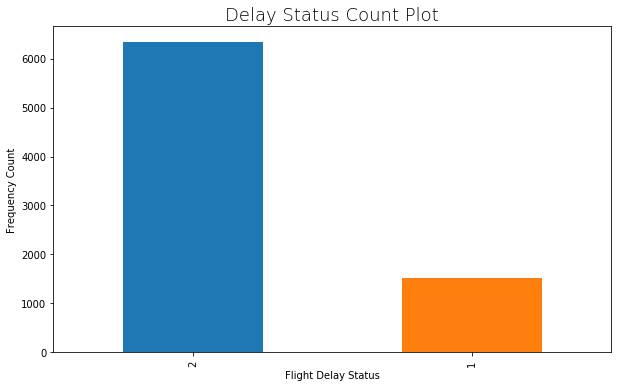

In [88]:
#Target variable distribution
flightstation1_tz["FlightDelayStatus"].value_counts().plot(kind='bar',figsize=(10,6))
plt.xlabel("Flight Delay Status")
plt.ylabel("Frequency Count")
plt.title("Delay Status Count Plot", fontdict={'fontsize': 18,
        'fontweight' : "light",
        'verticalalignment': 'baseline'})
plt.show()


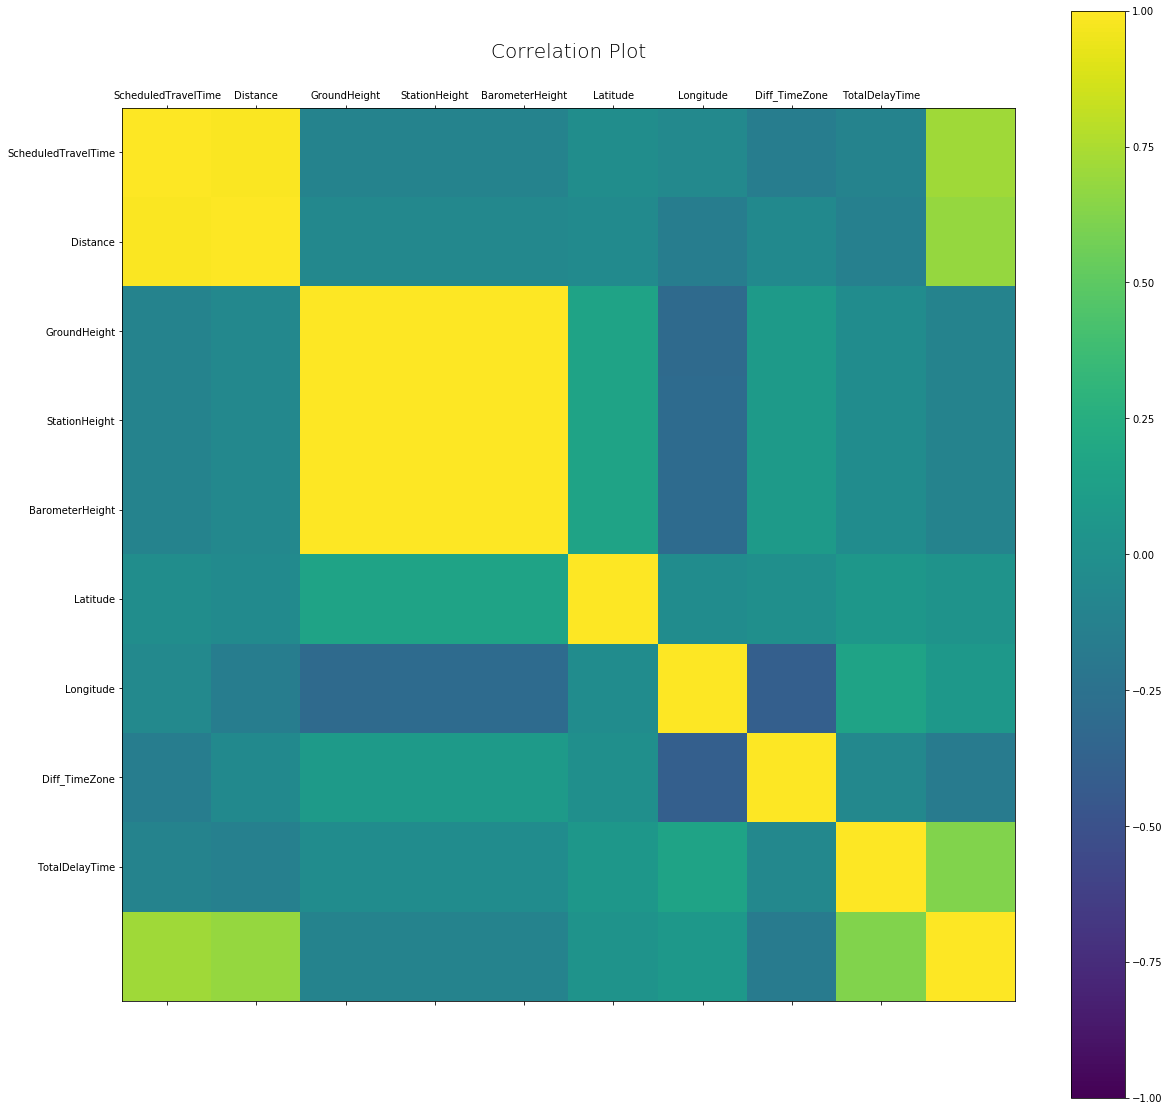

In [89]:
names=["ScheduledTravelTime","Distance","GroundHeight","StationHeight","BarometerHeight","Latitude","Longitude",
       "Diff_TimeZone","TotalDelayTime","ActualTravelTime"]
correlations = flightstation1_tz[names].corr()
# plot correlation matrix
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
ax.set_title("Correlation Plot",fontdict= {'fontsize': 20, 'fontweight' : 'light',
        'verticalalignment': 'baseline'}
)
plt.show()

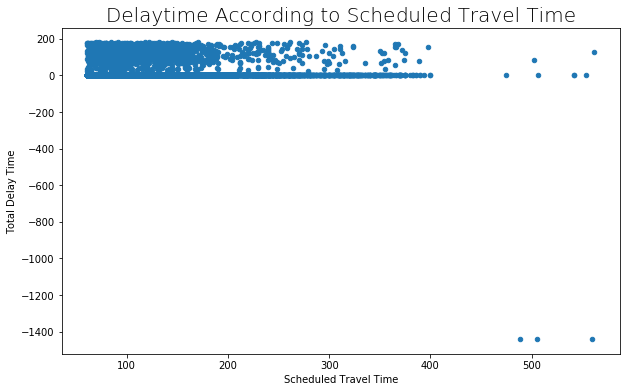

In [90]:
#
flightstation1_tz.plot(x='ScheduledTravelTime', y= 'TotalDelayTime',kind='scatter',figsize=(10,6))
plt.xlabel("Scheduled Travel Time")
plt.ylabel("Total Delay Time")
plt.title("Delaytime According to Scheduled Travel Time", fontdict={'fontsize': 20,
        'fontweight' : "light",
        'verticalalignment': 'baseline'})
plt.show()

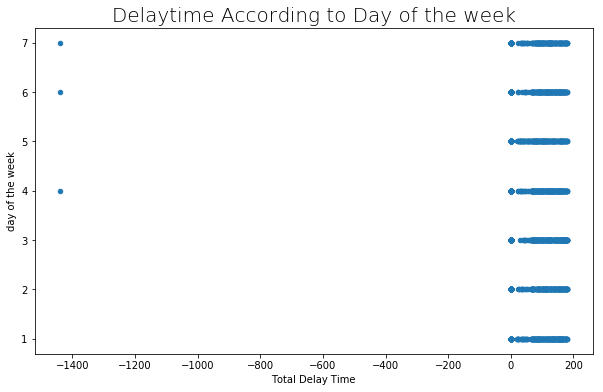

In [91]:
#Delaytime According to Day of the week
flightstation1_tz.plot(x='TotalDelayTime', y= 'DayOfWeek',kind='scatter',figsize=(10,6))
plt.xlabel("Total Delay Time")
plt.ylabel("day of the week")
plt.title("Delaytime According to Day of the week", fontdict={'fontsize': 20,
        'fontweight' : "light",
        'verticalalignment': 'baseline'})
plt.show()

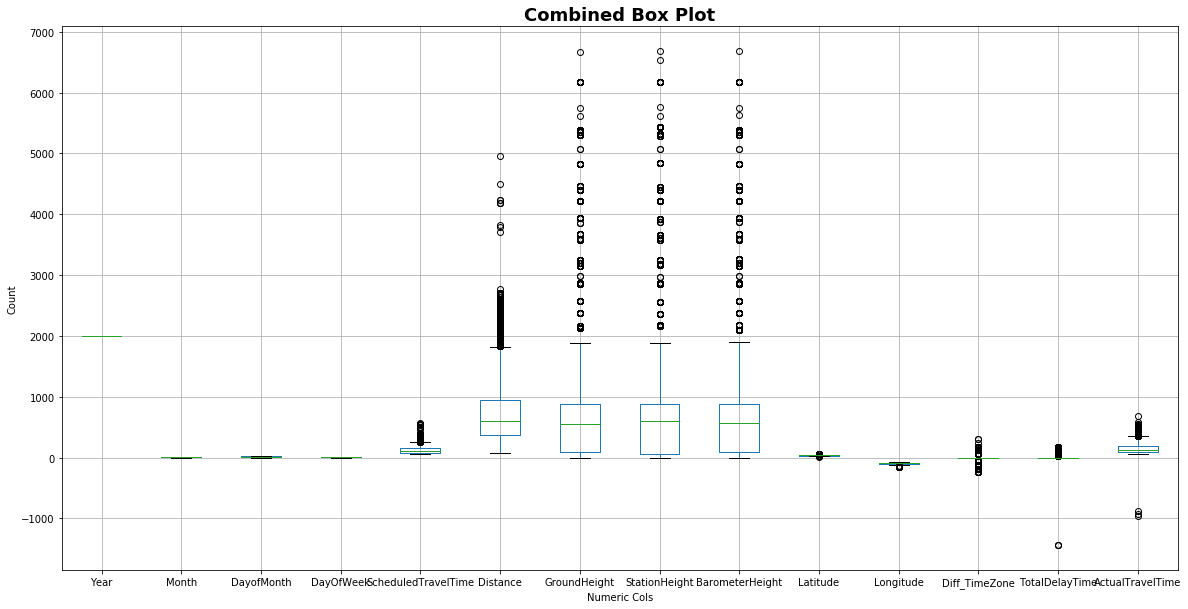

In [92]:
flightstation1_tz.boxplot(figsize=(20,10))
plt.xlabel("Numeric Cols")
plt.ylabel("Count")
plt.title("Combined Box Plot", fontdict={'fontsize': 18,
        'fontweight' : "bold",
        'verticalalignment': 'baseline'})

plt.show()


###### --------------------------------------------------------------------We have Outliers in the data------------------------------------------------------------------------------- 

In [93]:
(flightstation1_tz["FlightNumber"].value_counts()).sum()

7861

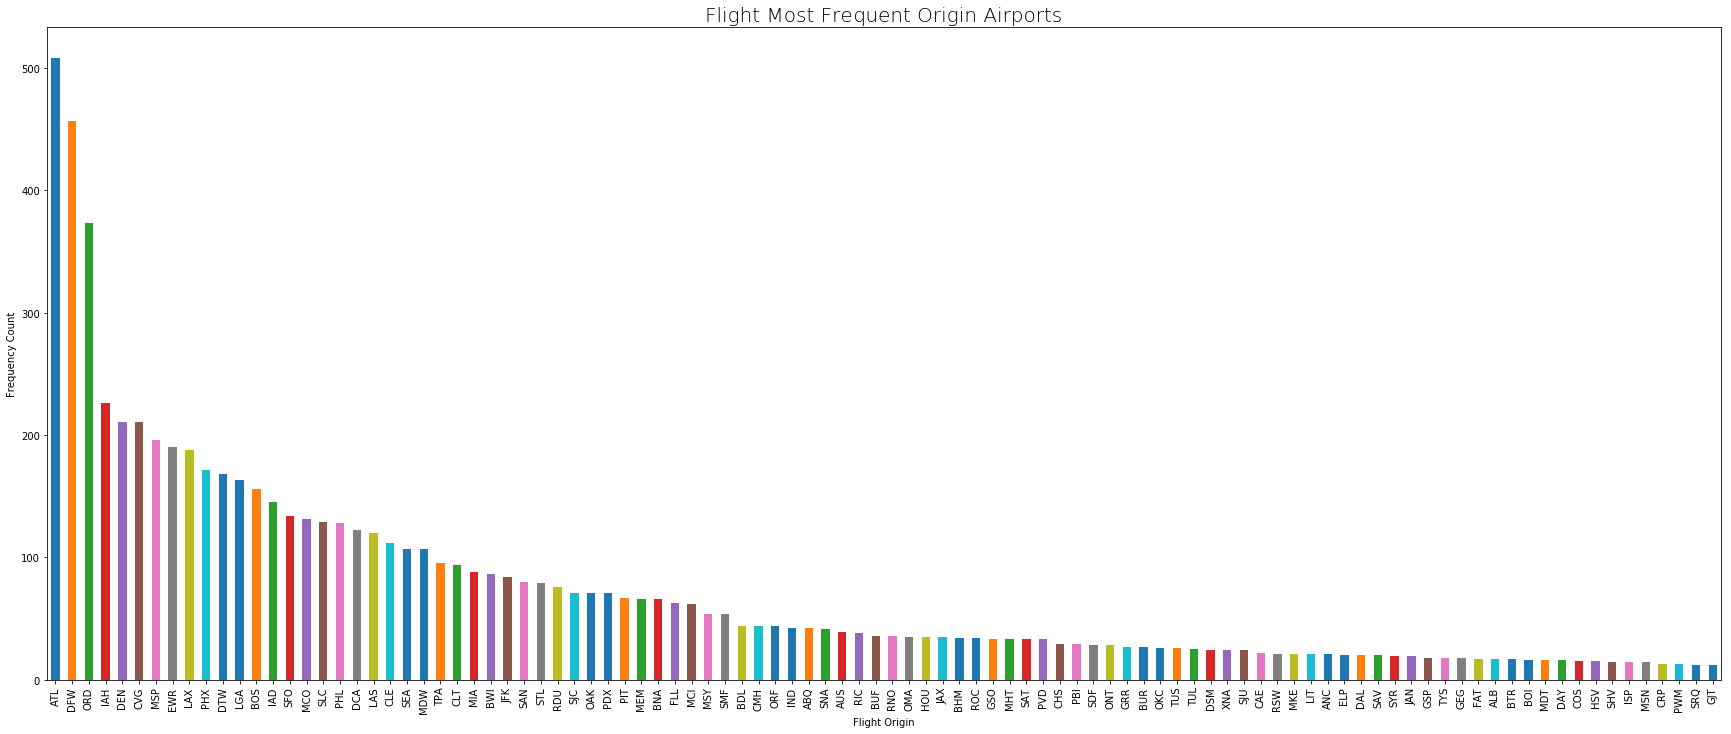

In [94]:
#Top 100 Most Frequent Airports
flightstation1_tz["Origin"].value_counts().head(100).plot(kind='bar',figsize=(30,12))
plt.xlabel("Flight Origin")
plt.ylabel("Frequency Count")
plt.title("Flight Most Frequent Origin Airports", fontdict={'fontsize': 20,
        'fontweight' : "light",
        'verticalalignment': 'baseline'})
plt.show()

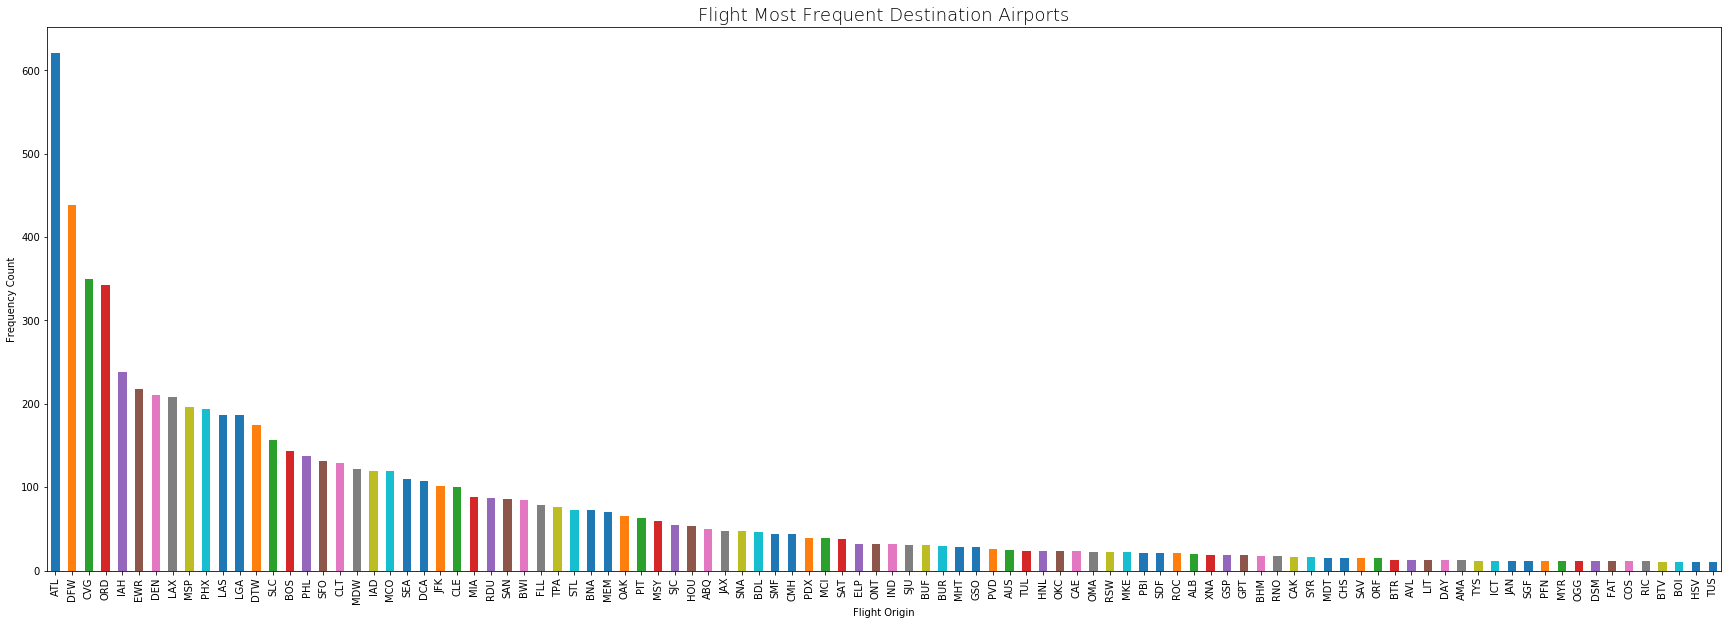

In [95]:
#Top 100 Most Frequent Airports
flightstation1_tz["Destination"].value_counts().head(100).plot(kind='bar',figsize=(30,10))
plt.xlabel("Flight Origin")
plt.ylabel("Frequency Count")
plt.title("Flight Most Frequent Destination Airports", fontdict={'fontsize': 18,
        'fontweight' : "light",
        'verticalalignment': 'baseline'})
plt.show()

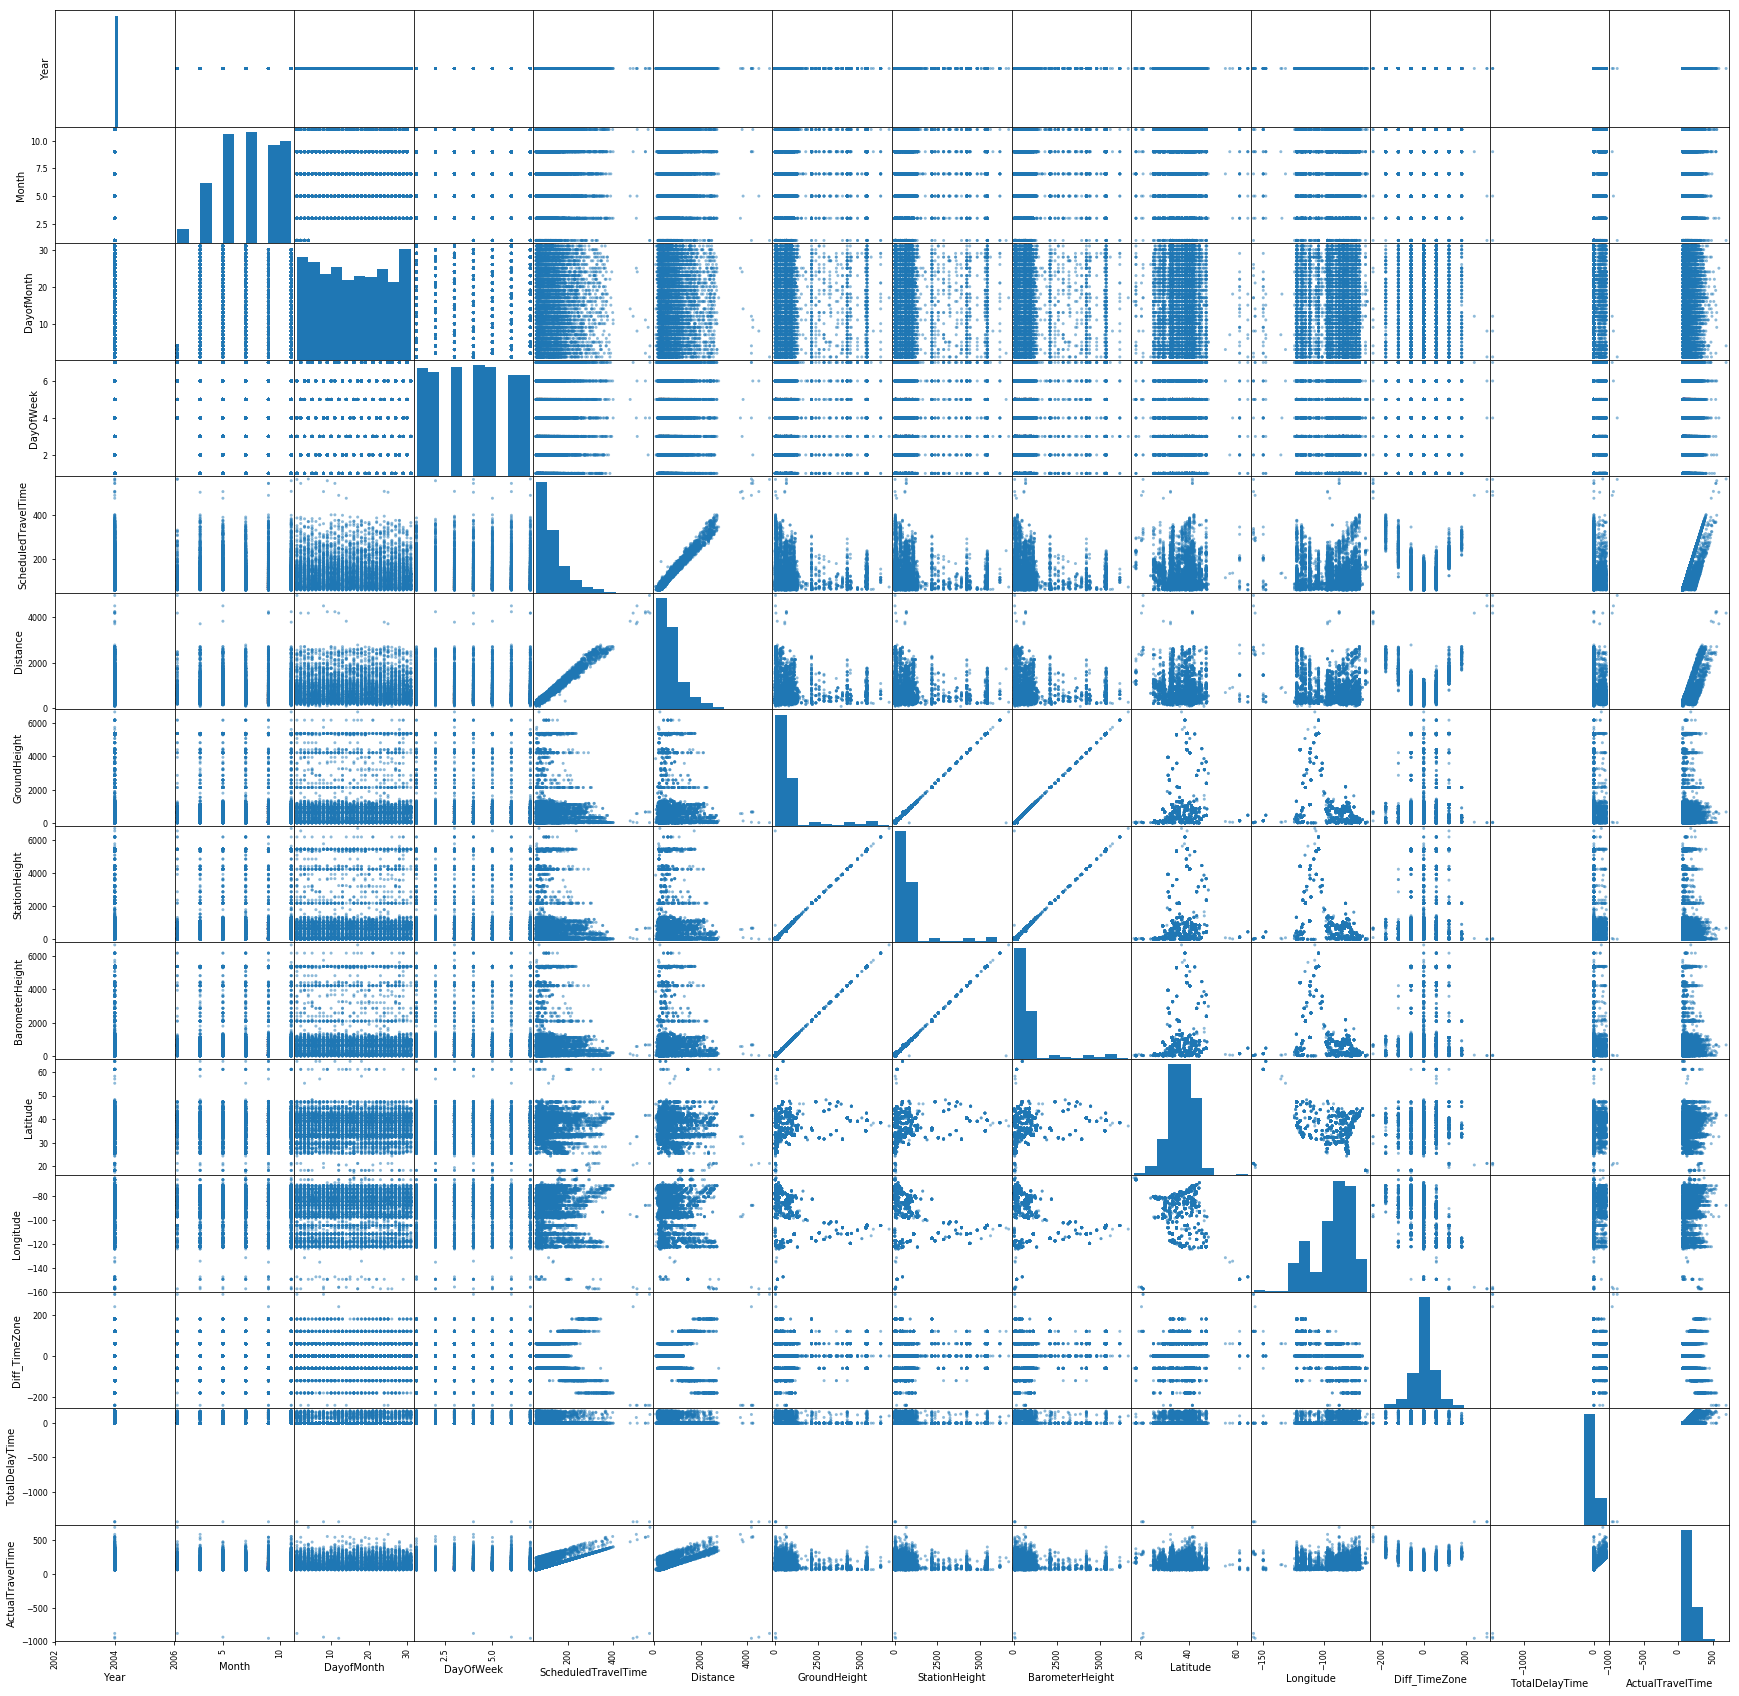

In [96]:
from pandas.plotting import scatter_matrix
scatter_matrix(flightstation1_tz, figsize=(30,30))
plt.show()
#plt.title("Combined Scatter Plot", fontdict={'fontsize': 18,
#        'fontweight' : "bold",
#        'verticalalignment': 'baseline'})

## Delayed Flight Insights and Visualizations

In [97]:
delayed_flights = flightstation1_tz[flightstation1_tz['FlightDelayStatus'] == '1']
delayed_flights['Destination'].value_counts()


ATL    137
CVG    111
ORD     66
DFW     65
EWR     50
IAH     50
DTW     35
LGA     35
BOS     35
MDW     32
RDU     31
IAD     31
CLT     25
PHL     24
JFK     23
LAX     23
MCO     22
MSP     22
DEN     20
CLE     18
DCA     18
SFO     18
STL     17
BNA     17
BWI     16
MIA     16
PIT     15
LAS     15
BDL     15
SLC     15
      ... 
HLN      0
MOT      0
HVN      0
MLB      0
ILE      0
RST      0
MAF      0
JNU      0
KOA      0
LAN      0
LNK      0
LFT      0
GFK      0
FSD      0
FLO      0
FAR      0
OTZ      0
EUG      0
EKO      0
EGE      0
LIH      0
PNS      0
PSC      0
DAL      0
RDD      0
CPR      0
RDM      0
COD      0
CID      0
JAC      0
Name: Destination, Length: 215, dtype: int64

In [98]:
delayed_by_carrier = flightstation1_tz.groupby(['Origin','FlightDelayStatus'], as_index=False ).size().unstack()
delayed_by_carrier= delayed_by_carrier.fillna(0)
delayed_by_carrier['1'] = delayed_by_carrier['1'].astype(int)
delayed_by_carrier['2'] = delayed_by_carrier['2'].astype(int)
delayed_by_carrier= delayed_by_carrier.rename(columns=str).reset_index()

delayed_by_carrier.head()

FlightDelayStatus,Origin,1,2
0,ABE,1,3
1,ABI,2,5
2,ABQ,2,40
3,ABY,3,1
4,ACV,1,3


In [99]:
#Getting total flights from perticular Airport
delayed_by_carrier['flights_count'] = (delayed_by_carrier['1']+delayed_by_carrier['2']).astype(int)
delayed_by_carrier[:5]

FlightDelayStatus,Origin,1,2,flights_count
0,ABE,1,3,4
1,ABI,2,5,7
2,ABQ,2,40,42
3,ABY,3,1,4
4,ACV,1,3,4


In [100]:
#delayed_by_carrier.columns = delayed_by_carrier.columns.delete()

In [101]:
#Getting the percentage/proportion of delayed flights from perticular Airport
delayed_by_carrier['proportion_delayed'] = delayed_by_carrier['1'] / delayed_by_carrier['flights_count']
delayed_by_carrier[:4]

FlightDelayStatus,Origin,1,2,flights_count,proportion_delayed
0,ABE,1,3,4,0.250000
1,ABI,2,5,7,0.285714
2,ABQ,2,40,42,0.047619
3,ABY,3,1,4,0.750000


In [102]:
#Getting top Airport details whose delay ratio is more than 0%
#delayed_by_carrier.sort_values('proportion_delayed', ascending=False)
sorted_byFlightcount_delayed_by_carrier= (delayed_by_carrier.sort_values('flights_count', ascending=True))
sorted_byFlightcount_delayed_by_carrier[(sorted_byFlightcount_delayed_by_carrier.sort_values('proportion_delayed', ascending=True))['proportion_delayed']== 0.0]

FlightDelayStatus,Origin,1,2,flights_count,proportion_delayed
118,KOA,0,1,1,0.0
39,CDC,0,1,1,0.0
199,SIT,0,1,1,0.0
209,STX,0,1,1,0.0
104,HTS,0,1,1,0.0
30,BRO,0,1,1,0.0
109,ILE,0,1,1,0.0
24,BIS,0,1,1,0.0
117,JNU,0,1,1,0.0
119,KTN,0,1,1,0.0


In [103]:
delayed_by_carrier.sort_values('flights_count', ascending=False)

FlightDelayStatus,Origin,1,2,flights_count,proportion_delayed
12,ATL,185,323,508,0.364173
60,DFW,90,367,457,0.196937
162,ORD,91,282,373,0.243968
107,IAH,46,180,226,0.203540
54,CVG,74,137,211,0.350711
59,DEN,26,185,211,0.123223
153,MSP,46,150,196,0.234694
72,EWR,52,138,190,0.273684
123,LAX,18,170,188,0.095745
169,PHX,4,167,171,0.023392


In [104]:
#Getting Top rows of Airports whose flight count high with delay ratio
sorted_byFlightcount_delayed_by_carrier1= (delayed_by_carrier.sort_values('proportion_delayed', ascending=True))
sorted_byFlightcount_delayed_by_carrier1.sort_values('flights_count', ascending=False).head(100)

FlightDelayStatus,Origin,1,2,flights_count,proportion_delayed
12,ATL,185,323,508,0.364173
60,DFW,90,367,457,0.196937
162,ORD,91,282,373,0.243968
107,IAH,46,180,226,0.203540
54,CVG,74,137,211,0.350711
59,DEN,26,185,211,0.123223
153,MSP,46,150,196,0.234694
72,EWR,52,138,190,0.273684
123,LAX,18,170,188,0.095745
169,PHX,4,167,171,0.023392


In [105]:
#getting top 100 rows whose avg delay is more than 20 minutes
((flightstation1_tz.pivot_table( values='TotalDelayTime', index="Origin", aggfunc=np.mean )).sort_values('TotalDelayTime',ascending=False)).head(100)

,TotalDelayTime
Origin,
BPT,167.000000
GGG,147.000000
HVN,141.000000
CLL,110.000000
DRO,106.000000
AVL,105.500000
BQK,102.000000
MEI,81.500000
ABY,80.500000


In [106]:
hi_volume = flightstation1_tz['Origin'].value_counts()[:20]
#hi_volume
hi_volume_airports_names = hi_volume.index.tolist()
hi_volume_airports = flightstation1_tz[flightstation1_tz['Origin'].isin(hi_volume_airports_names)]
#hi_volume_airports.head()
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='DayOfWeek', columns='Origin', values='TotalDelayTime')
hi_volume_airports_pivots.describe()

Origin,ATL,BOS,CVG,DCA,DEN,DFW,DTW,EWR,IAD,IAH,LAS,LAX,LGA,MCO,MSP,ORD,PHL,PHX,SFO,SLC
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,43.406421,31.627330,37.785566,26.739220,13.764276,23.045399,32.759748,32.915764,32.132160,23.402315,7.269253,9.283382,30.298025,11.576860,28.744537,27.401254,24.078094,1.203628,4.962943,11.368524
std,8.346142,13.954571,19.189299,18.261453,12.887170,13.191638,10.832399,9.093799,6.519328,18.677103,5.430180,6.788897,12.022991,5.198965,24.774902,12.090882,13.048886,2.151728,4.252983,9.369708
min,33.023810,6.666667,20.545455,7.960000,3.272727,10.821429,20.115385,22.931034,24.157895,0.000000,0.000000,0.000000,12.961538,1.692308,4.620690,11.019231,0.000000,0.000000,0.000000,0.000000
25%,37.978182,26.746032,22.619658,15.958462,6.861111,14.317340,24.542857,27.000000,26.983333,6.951852,2.708333,4.917208,23.056391,10.375000,13.230978,19.984555,18.640316,0.000000,2.700000,4.015789
50%,43.602740,31.842105,31.560000,23.714286,10.370370,17.791045,30.047619,29.520000,33.304348,28.531250,10.894737,8.038462,30.727273,11.631579,21.107143,26.638298,30.933333,0.000000,5.526316,10.200000
75%,48.369478,39.552381,51.198718,30.375000,13.825641,29.004831,40.352941,38.329655,35.560606,36.440625,11.286685,14.055400,36.869565,14.612500,36.579167,33.091071,32.966346,1.555556,5.621429,19.151316
max,54.523077,50.285714,64.756757,62.833333,41.333333,46.060976,49.363636,47.300000,42.375000,48.500000,12.000000,19.000000,48.545455,17.739130,75.863636,48.000000,34.400000,5.314286,12.571429,23.045455


In [107]:
hi_volume_airports_pivots

Origin,ATL,BOS,CVG,DCA,DEN,DFW,DTW,EWR,IAD,IAH,LAS,LAX,LGA,MCO,MSP,ORD,PHL,PHX,SFO,SLC
DayOfWeek,,,,,,,,,,,,,,,,,,,,
1,53.072289,30.111111,23.961538,7.960000,4.555556,22.111111,49.363636,33.379310,34.954545,28.531250,0.000000,8.038462,32.565217,1.692308,28.700000,26.638298,34.307692,0.000000,0.000000,1.400000
2,43.666667,31.842105,20.545455,31.500000,10.370370,35.898551,41.705882,47.300000,36.166667,34.600000,0.000000,14.806452,12.961538,11.631579,44.458333,31.025000,12.826087,5.314286,5.526316,16.250000
3,33.848837,40.342857,63.897436,9.840000,15.933333,17.791045,39.000000,27.461538,42.375000,6.200000,5.416667,7.107143,48.545455,13.600000,75.863636,48.000000,34.400000,0.000000,5.642857,6.631579
4,42.107527,23.380952,31.560000,22.076923,3.272727,46.060976,26.428571,26.538462,33.304348,38.281250,11.260870,19.000000,21.428571,17.739130,20.086957,20.520833,0.000000,3.111111,12.571429,22.052632
5,43.602740,50.285714,38.500000,23.714286,11.717949,10.821429,20.115385,29.520000,28.966667,0.000000,11.312500,2.727273,30.727273,15.625000,6.375000,19.448276,31.625000,0.000000,5.400000,0.000000
6,54.523077,38.761905,64.756757,29.250000,41.333333,11.240741,22.657143,43.280000,24.157895,48.500000,12.000000,13.304348,41.173913,9.125000,4.620690,11.019231,24.454545,0.000000,0.000000,23.045455
7,33.023810,6.666667,21.277778,62.833333,9.166667,17.393939,30.047619,22.931034,25.000000,7.703704,10.894737,0.000000,24.684211,11.625000,21.107143,35.157143,30.933333,0.000000,5.600000,10.200000


In [108]:
#airport_bins = np.arange(-10,90,4)
#hi_volume_airports_pivots.plot(kind='hist', bins=airport_bins, figsize=[10,6], alpha=.8, legend=True, title="Delay in Airports on week of the Month")
    

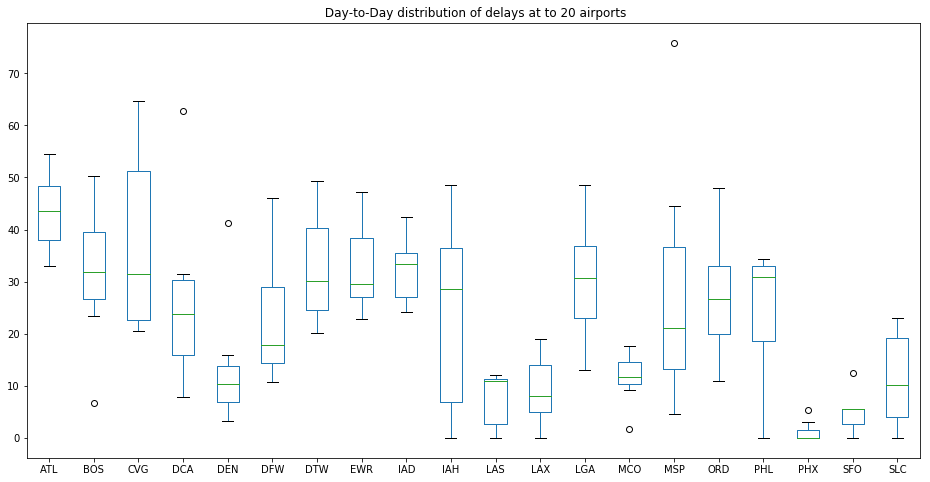

In [109]:
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='DayOfWeek', columns='Origin', values='TotalDelayTime')
hi_volume_airports_pivots.plot(kind='box', figsize=[16,8], title=" Day-to-Day distribution of delays at to 20 airports")

